### Importing necessary library

In [1]:
import pandas as pd
import numpy as np

import datetime

import seaborn as sns
import matplotlib.pyplot as plt

### Reading the cleaned data file

In [2]:
rent_df = pd.read_csv('../Data/canada_rent_clean.csv')
rent_df.head(5)

,city,province,latitude,longitude,lease_term,type,price,beds,baths,sq_feet,furnishing,availability_date,smoking,cats,dogs
0,Airdrie,Alberta,51.271725,-114.020135,Negotiable,Apartment,2390,0,1.0,361,Unfurnished,2025-02-23,Non-Smoking,True,True
1,Airdrie,Alberta,51.271725,-114.020135,Negotiable,Apartment,3615,1,1.0,525,Unfurnished,2025-02-23,Non-Smoking,True,True
2,Airdrie,Alberta,51.271725,-114.020135,Negotiable,Apartment,4520,2,1.0,810,Unfurnished,2025-02-23,Non-Smoking,True,True
3,Airdrie,Alberta,51.271725,-114.020135,Negotiable,Apartment,1930,0,1.0,265,Unfurnished,2025-02-23,Non-Smoking,True,True
4,Airdrie,Alberta,51.285251,-114.010128,Long Term,Main Floor,1700,2,1.0,997,Unfurnished,2025-02-23,Non-Smoking,False,False


### Investigating data distribution

**Price distribution**

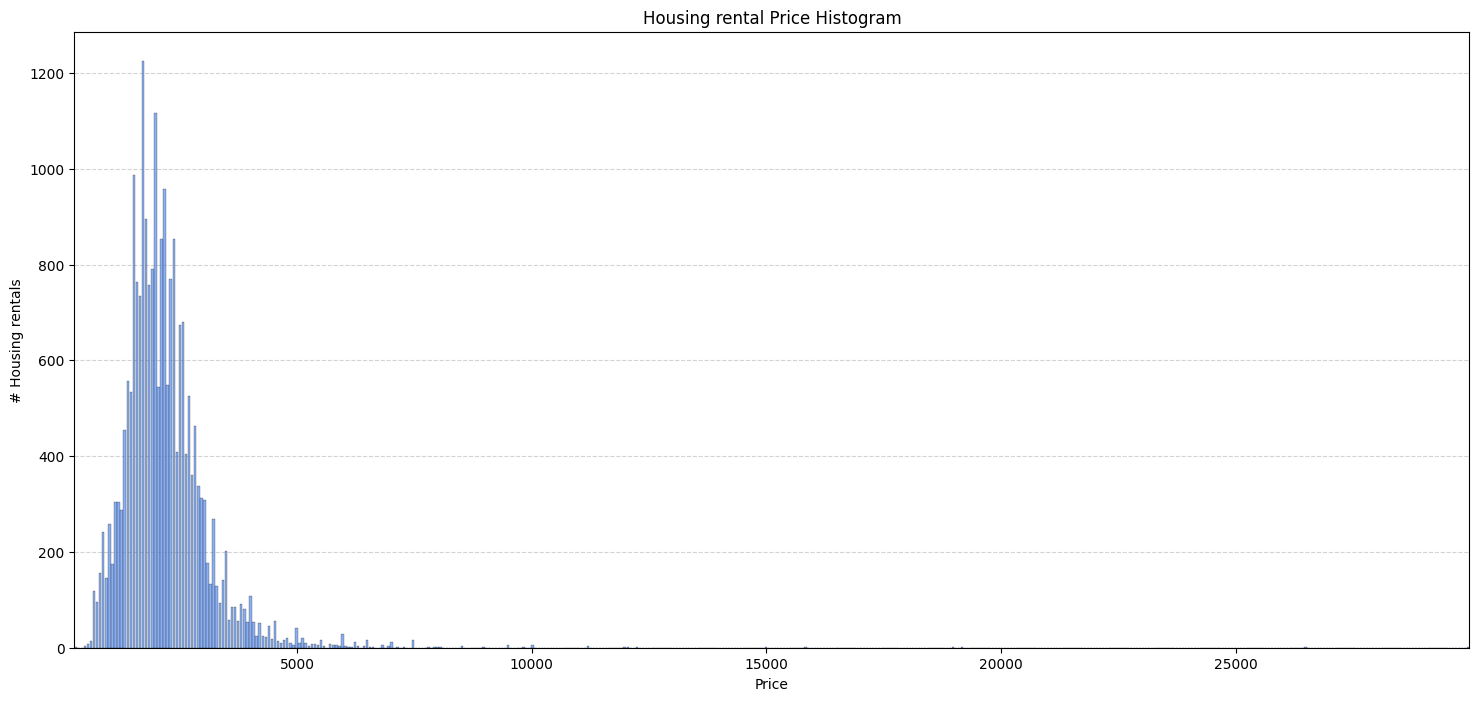

In [3]:
# Price histogram

# Create the plot and adjust its size
plt.figure( figsize=(18, 8))

# Create histogramme
ax = sns.histplot(rent_df, x= 'price', shrink = 0.8,  stat='count', legend=False, color='cornflowerblue')

# Set title
ax.set_title('Housing rental Price Histogram')

# Adjust the axis label
ax.set(xlabel='Price', ylabel='# Housing rentals')

# Removed white margin on the x axis
ax.margins(x=0) 

# Keep only he grid line along the x-axis
ax.set_axisbelow(True)
ax.grid(axis='y', zorder = 0, color='lightgray', linestyle='dashed')

# Show plot
plt.show()

In [33]:
lst = [(rent_df[rent_df['price'] > 10000]['city'].count() / len(rent_df)) * 100,
       (rent_df[rent_df['price'] > 8000]['city'].count() / len(rent_df)) * 100,
       (rent_df[rent_df['price'] > 7000]['city'].count() / len(rent_df)) * 100,
       (rent_df[rent_df['price'] > 5000]['city'].count() / len(rent_df)) * 100,
      ]

col = ['Adds with price > 10 000$',
       'Adds with price > 8 000$',
       'Adds with price > 7 000$',
       'Adds with price > 5 000$',
      ]

pd.DataFrame(lst, columns=['%'], index=col)

,%
Adds with price > 10 000$,0.076029
Adds with price > 8 000$,0.161002
Adds with price > 7 000$,0.268336
Adds with price > 5 000$,1.149374


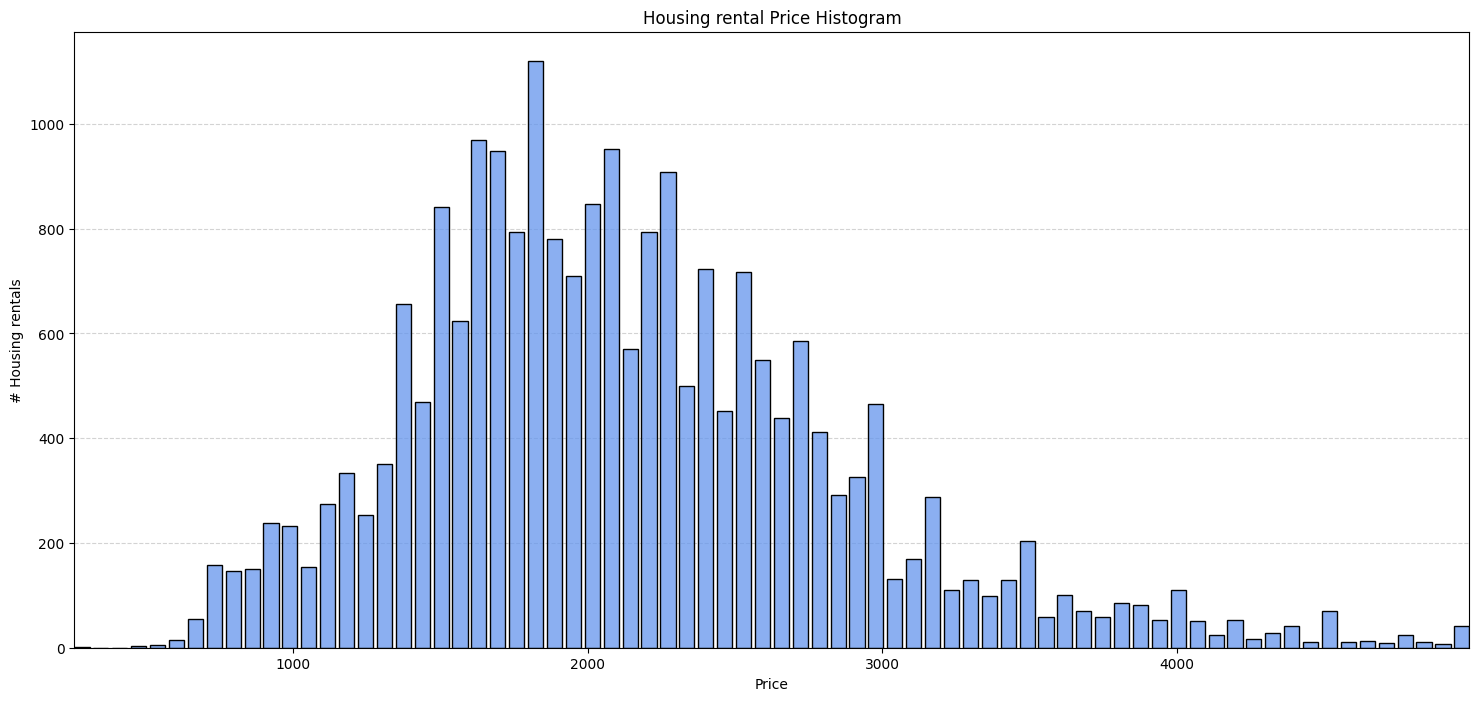

In [35]:
# Price histogram

# Create the plot and adjust its size
plt.figure( figsize=(18, 8))

# Create histogramme
ax = sns.histplot(rent_df[rent_df['price'] <= 5000], x= 'price', shrink = 0.8,  stat='count', legend=False, color='cornflowerblue')

# Set title
ax.set_title('Housing rental Price Histogram')

# Adjust the axis label
ax.set(xlabel='Price', ylabel='# Housing rentals')

# Removed white margin on the x axis
ax.margins(x=0) 

# Keep only he grid line along the x-axis
ax.set_axisbelow(True)
ax.grid(axis='y', zorder = 0, color='lightgray', linestyle='dashed')

# Show plot
plt.show()

**Is all Province represented equally in the dataset?**

Conclusion the model will perform poorly over certain Province due to under representativity of the sample dataset.

  * Province such as - New Brunswick
                     - Newfoundland and Labrador
                     - Northwest Territories

    will most likely has very poor result by trying to perform a forecast with any model

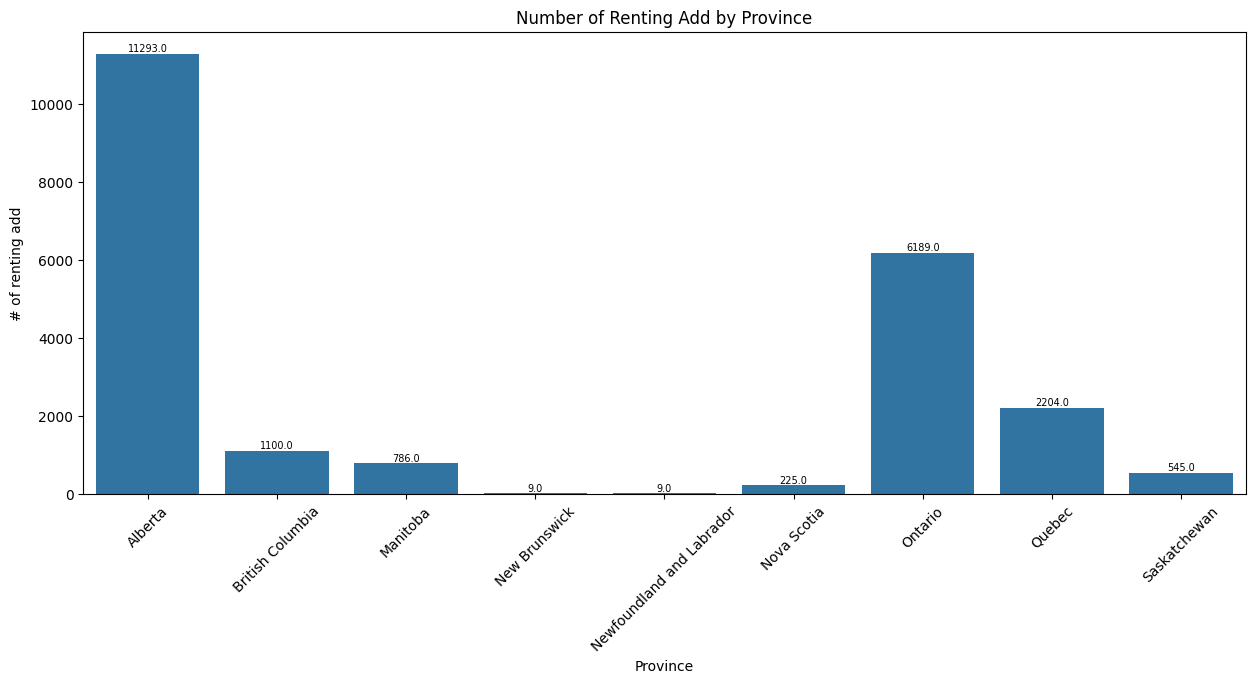

In [4]:
# Total # of athletes

# Create the plot and adjust its size
plt.figure( figsize=(15, 6))

# Create histogramme
ax = sns.countplot(rent_df, x= 'province', legend=False)

# Set title
ax.set_title('Number of Renting Add by Province')

# Adjust the ticks
ax.tick_params(axis='x', labelrotation=45, labelsize = 10)
ax.tick_params(axis='y', labelsize = 10)

# Adjust the axis label
ax.set(xlabel='Province', ylabel='# of renting add')

# Add bar labels
for index, artist in enumerate(ax.containers) :
    labels = [str(v) if v else '' for v in artist.datavalues]
    ax.bar_label(artist, labels=labels, fontsize = 7)

# Show plot
plt.show()

**Price vs Province**

Conclusion the province itself has an impact on the price of an housing rental

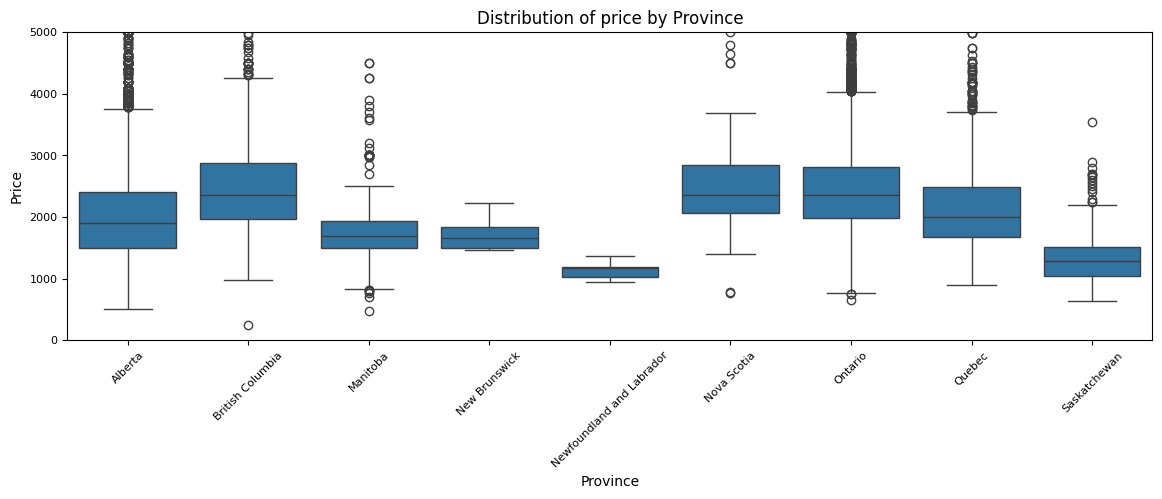

In [5]:


plt.figure(figsize = (14,4))

ax = sns.boxplot(data=rent_df, x='province', y='price') 

# Add Title
ax.set_title(f'Distribution of price by Province')

# Adjust the ticks label size
ax.tick_params(axis='x', labelrotation=45, labelsize = 8)
ax.tick_params(axis='y', labelsize = 8)

# Set the axis labels 
ax.set_xlabel('Province',fontsize = 10)
ax.set_ylabel('Price',fontsize = 10)

# Zooming in to removed outliers
ax.set_ylim(0,5000)

# Show plot
plt.show()

**Price vs Province for allowing Pets**

 Conclusion : Pets will be a contributing factor to the price

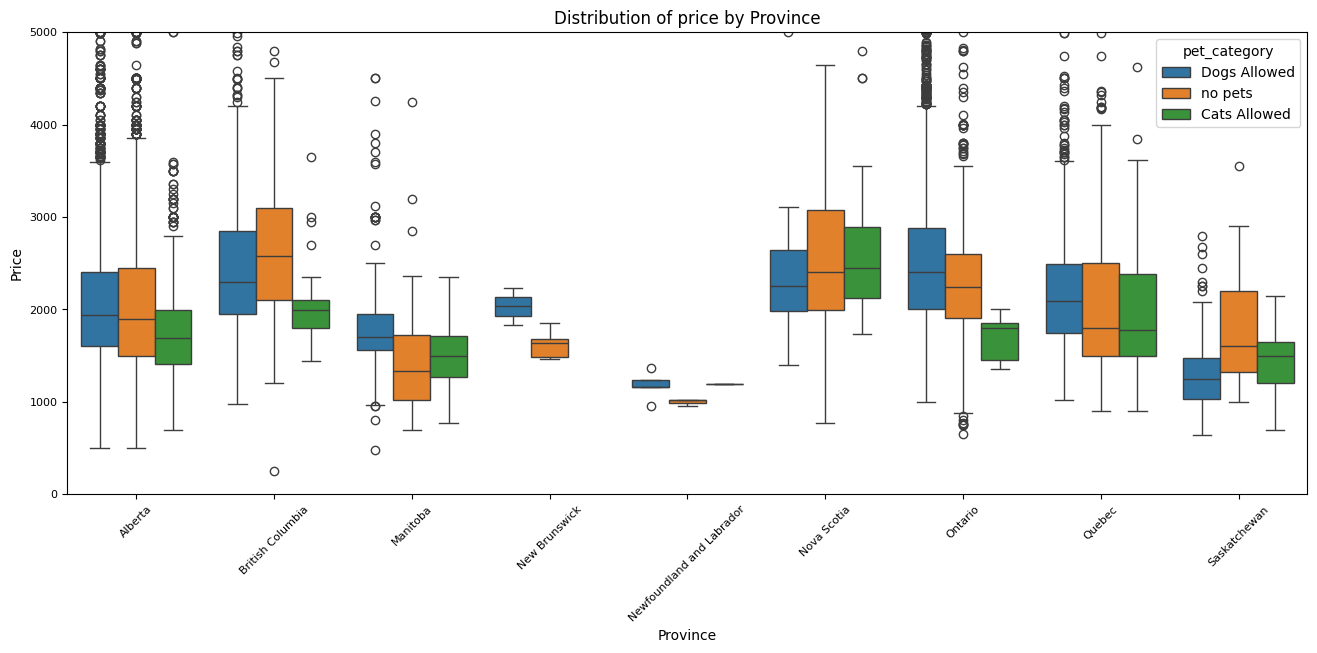

In [6]:
# Creating new column for to get a nice graph
rent_df['pet_category'] = 'no pets'
rent_df.loc[rent_df['cats'] == True, 'pet_category'] = 'Cats Allowed'
rent_df.loc[rent_df['dogs'] == True, 'pet_category'] = 'Dogs Allowed'

plt.figure(figsize = (16,6))

ax = sns.boxplot(data=rent_df, x='province', y='price', hue='pet_category') 
# Add Title
ax.set_title(f'Distribution of price by Province')

# Adjust the ticks label size
ax.tick_params(axis='x', labelrotation=45, labelsize = 8)
ax.tick_params(axis='y', labelsize = 8)

# Set the axis labels 
ax.set_xlabel('Province',fontsize = 10)
ax.set_ylabel('Price',fontsize = 10)

# Zooming in to removed outliers
ax.set_ylim(0,5000)

# Show plot
plt.show()

**Price vs Province for allowing smoking**

 Conclusion : Smoking allowed rental is not present for all province. Therefore, smoking might not be a strong predictor. 

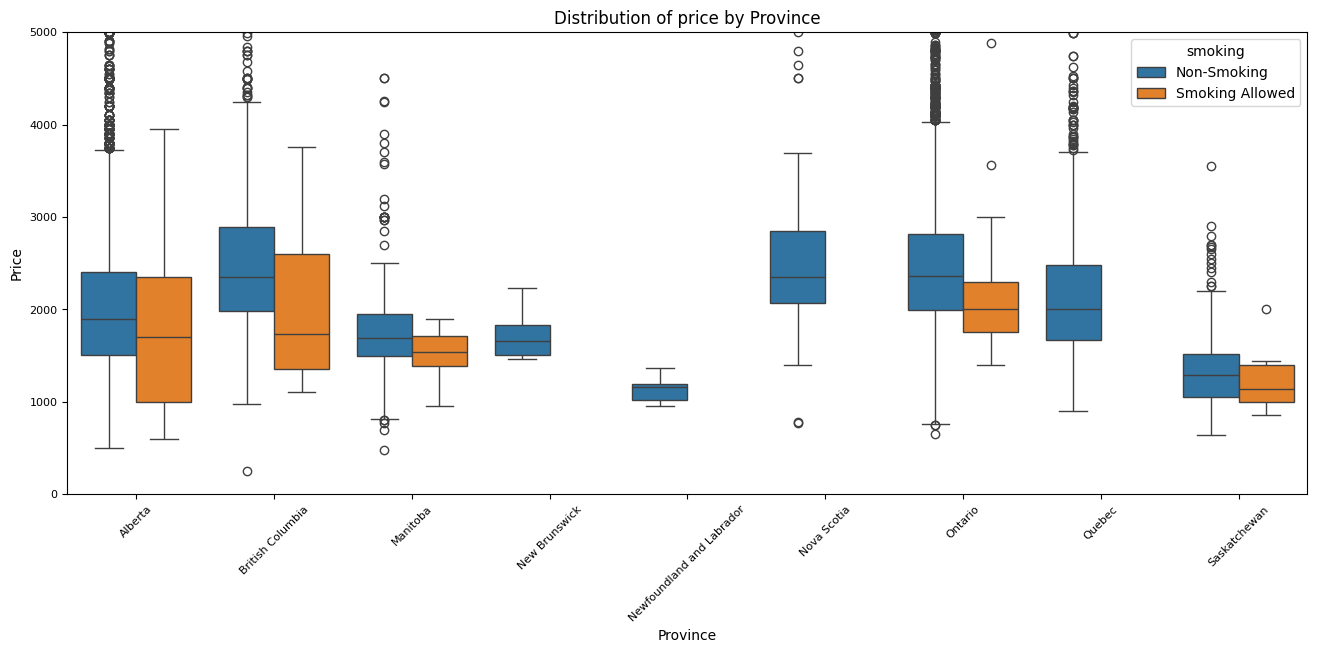

In [7]:

plt.figure(figsize = (16,6))

ax = sns.boxplot(data=rent_df, x='province', y='price', hue='smoking') 
# Add Title
ax.set_title(f'Distribution of price by Province')

# Adjust the ticks label size
ax.tick_params(axis='x', labelrotation=45, labelsize = 8)
ax.tick_params(axis='y', labelsize = 8)

# Set the axis labels 
ax.set_xlabel('Province',fontsize = 10)
ax.set_ylabel('Price',fontsize = 10)

# Zooming in to removed outliers
ax.set_ylim(0,5000)

# Show plot
plt.show()

**Price vs type**

The type of rental influences the price.

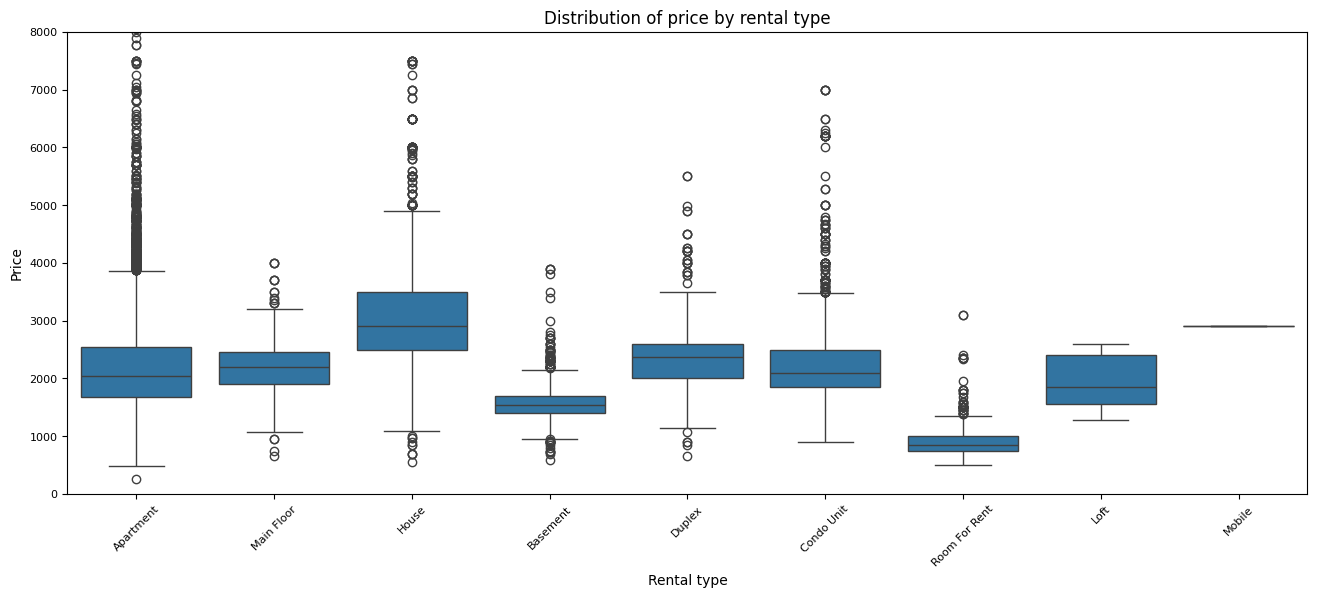

In [8]:

plt.figure(figsize = (16,6))

ax = sns.boxplot(data=rent_df, x='type', y='price') 
# Add Title
ax.set_title(f'Distribution of price by rental type')

# Adjust the ticks label size
ax.tick_params(axis='x', labelrotation=45, labelsize = 8)
ax.tick_params(axis='y', labelsize = 8)

# Set the axis labels 
ax.set_xlabel('Rental type',fontsize = 10)
ax.set_ylabel('Price',fontsize = 10)

# Zooming in to removed outliers
ax.set_ylim(0,8000)

# Show plot
plt.show()

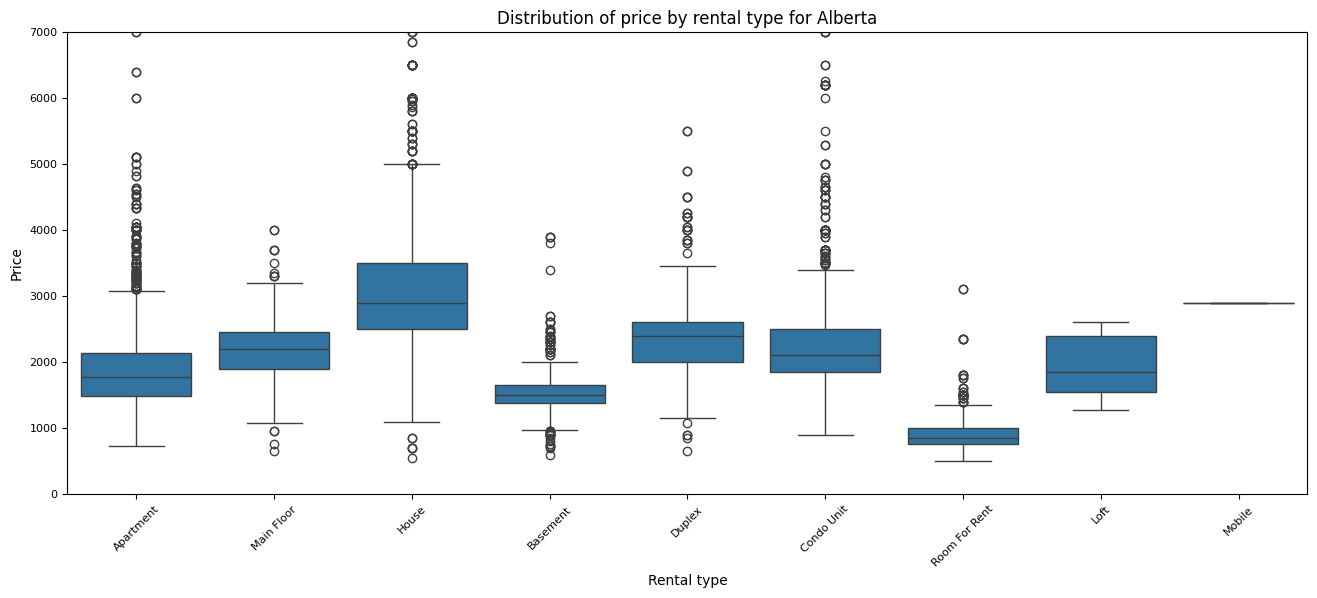

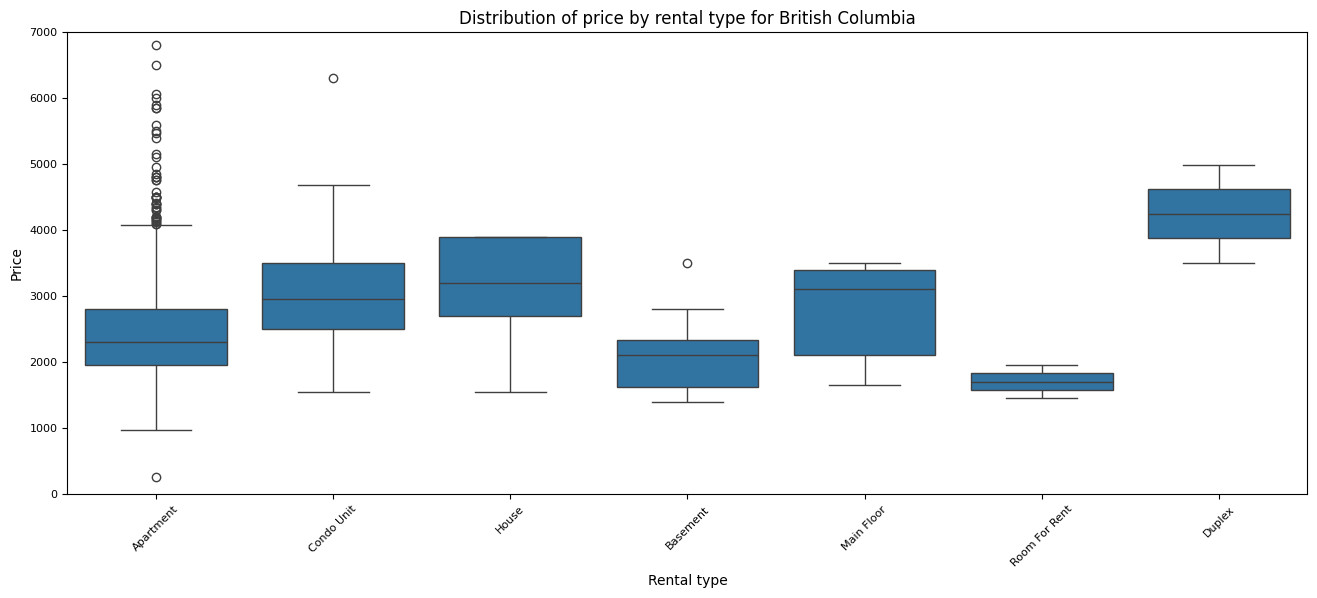

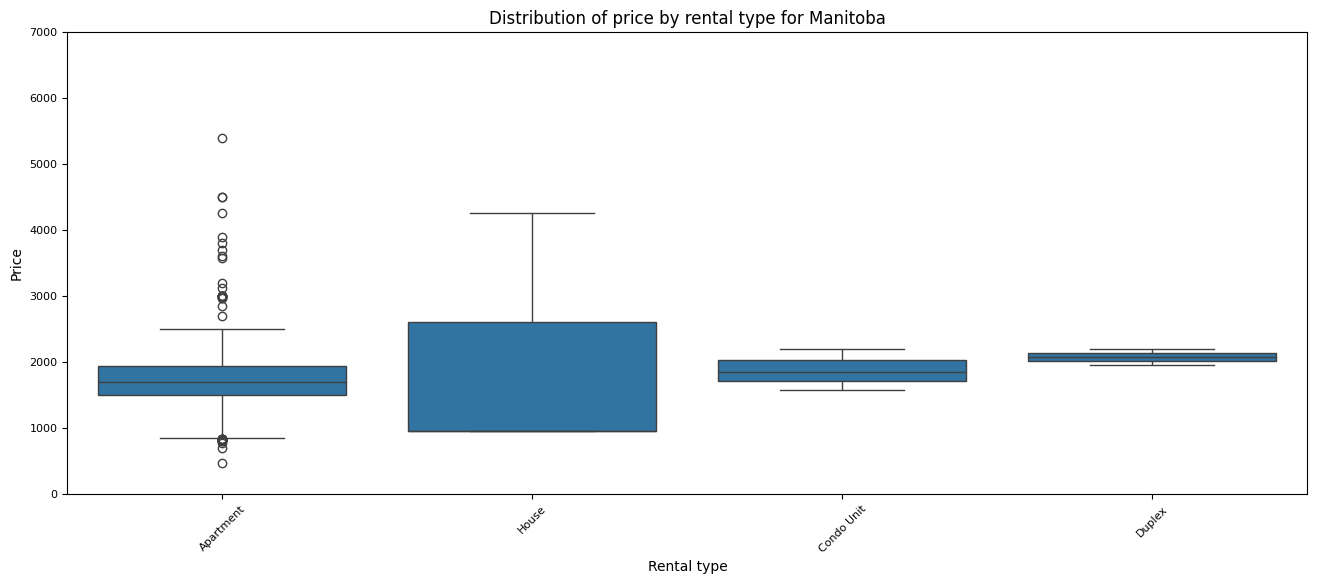

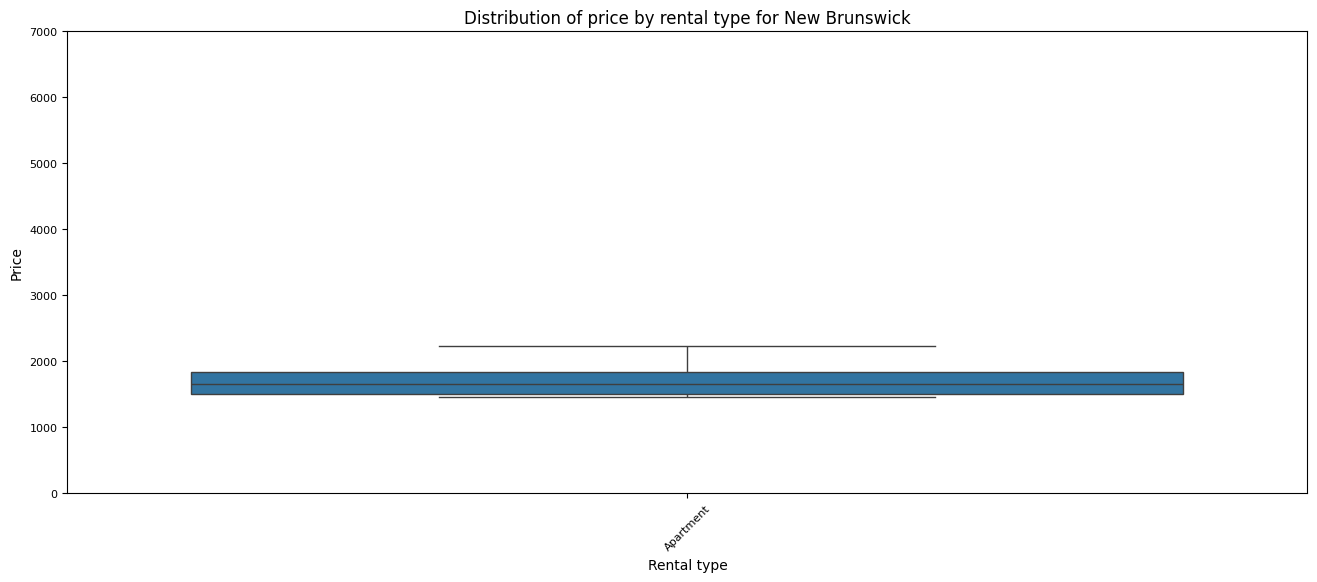

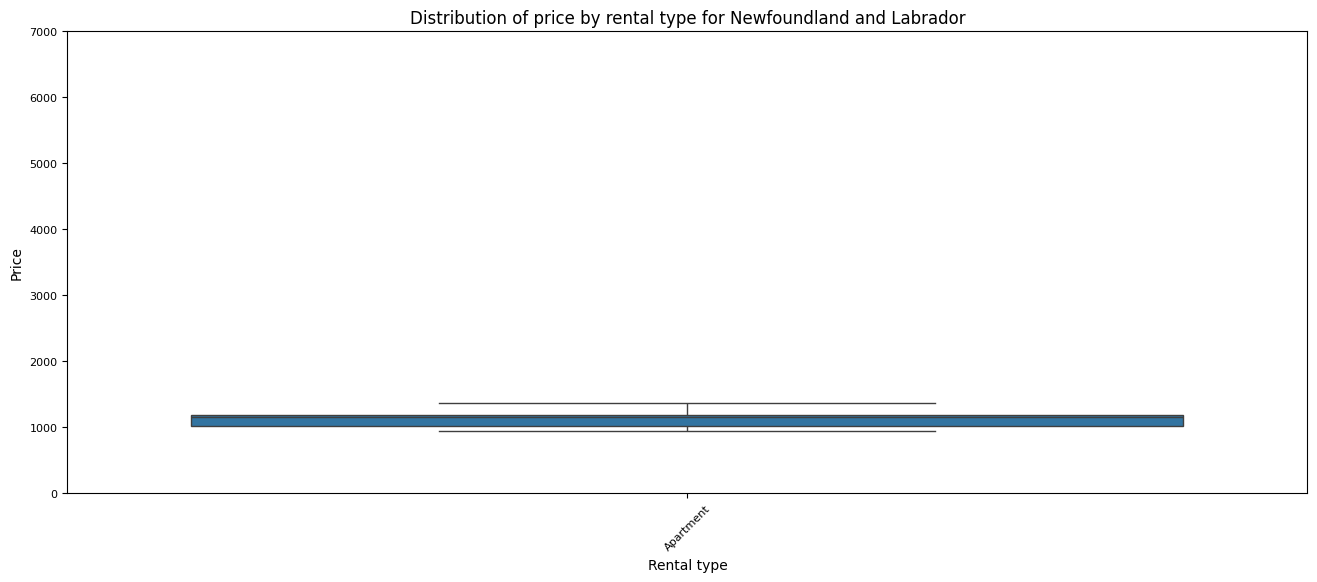

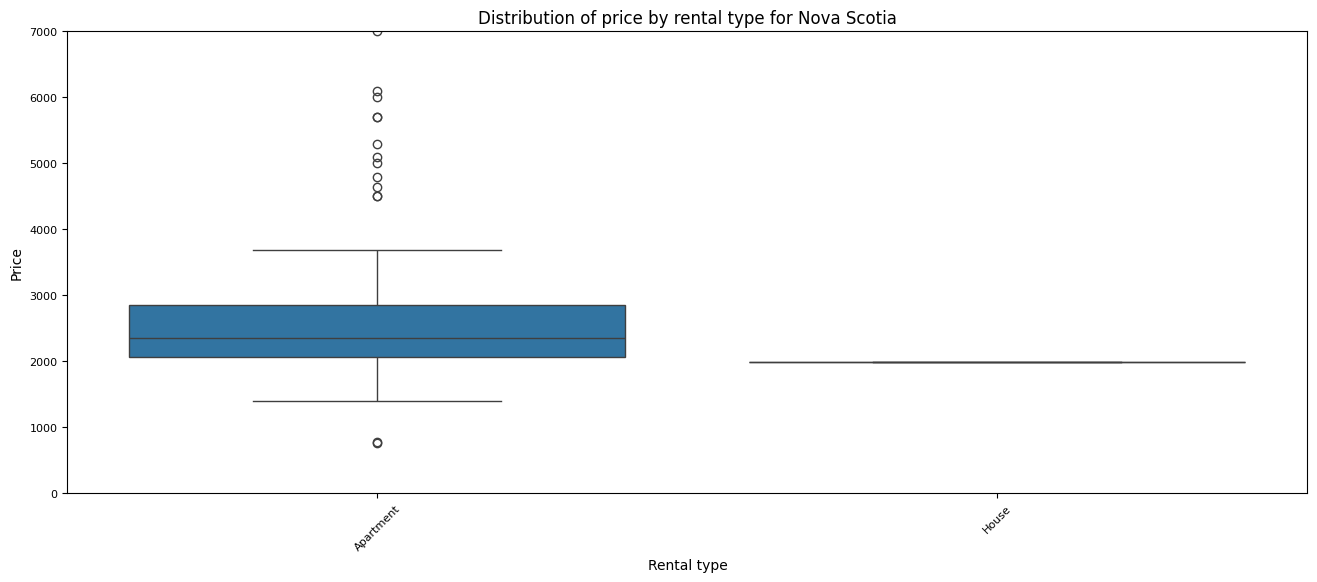

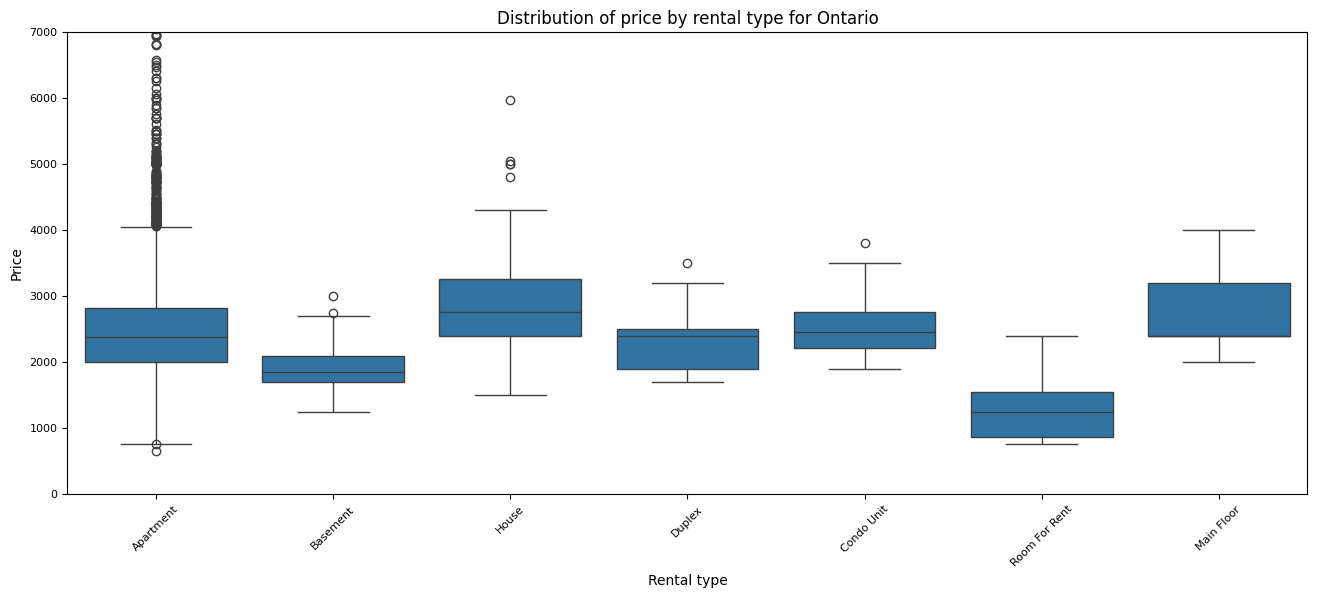

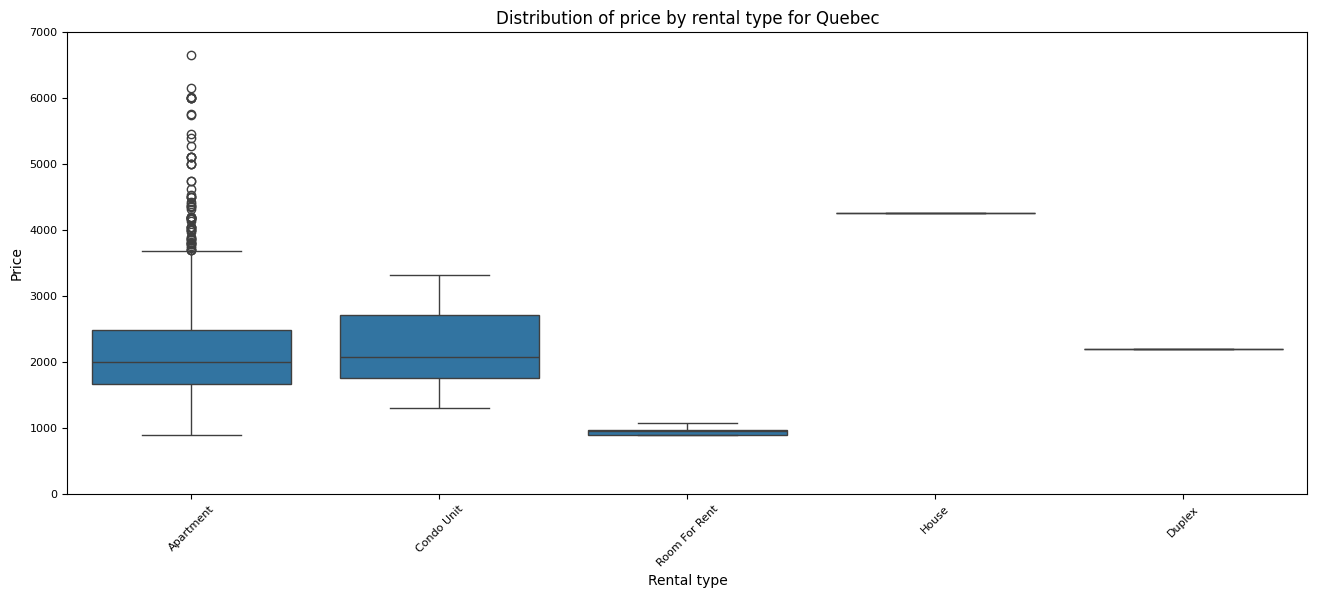

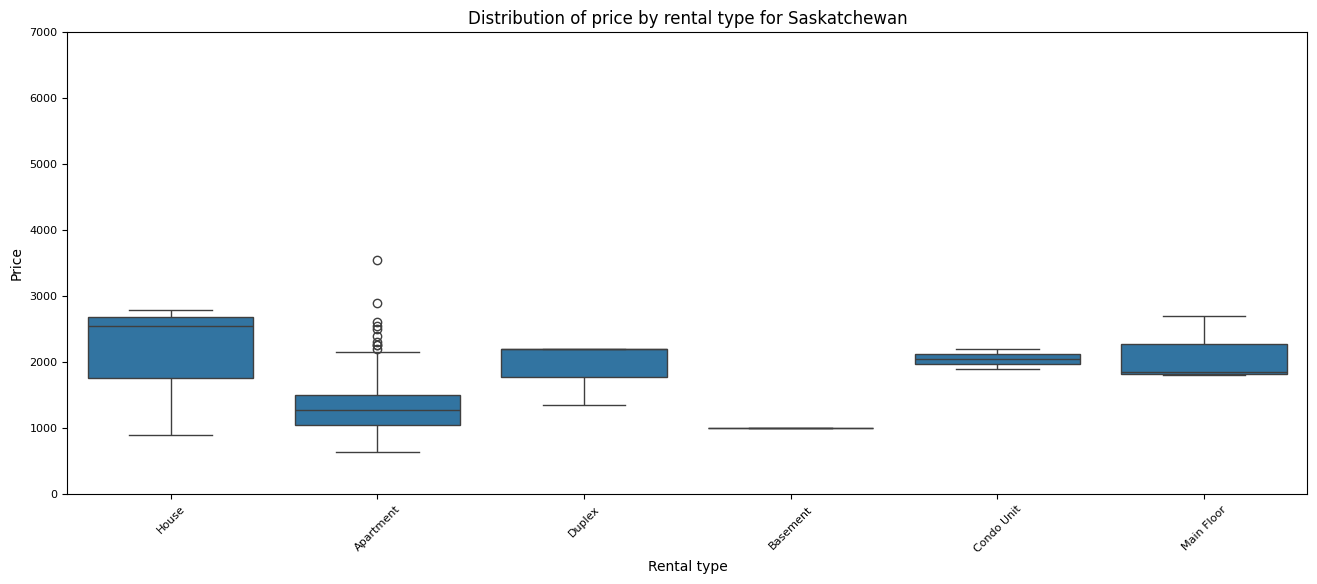

In [9]:
for province in rent_df['province'].unique() :
    plt.figure(figsize = (16,6))

    ax = sns.boxplot(data=rent_df[rent_df['province'] == province], x='type', y='price') 
    
    # Add Title
    ax.set_title(f'Distribution of price by rental type for {province}')

    # Adjust the ticks label size
    ax.tick_params(axis='x', labelrotation=45, labelsize = 8)
    ax.tick_params(axis='y', labelsize = 8)

    # Set the axis labels 
    ax.set_xlabel('Rental type',fontsize = 10)
    ax.set_ylabel('Price',fontsize = 10)

    # Zooming in to removed outliers
    ax.set_ylim(0,7000)

    # Show plot
    plt.show()

**Price vs furnished**

Conclusion : furnishing will not be a strong predictor.

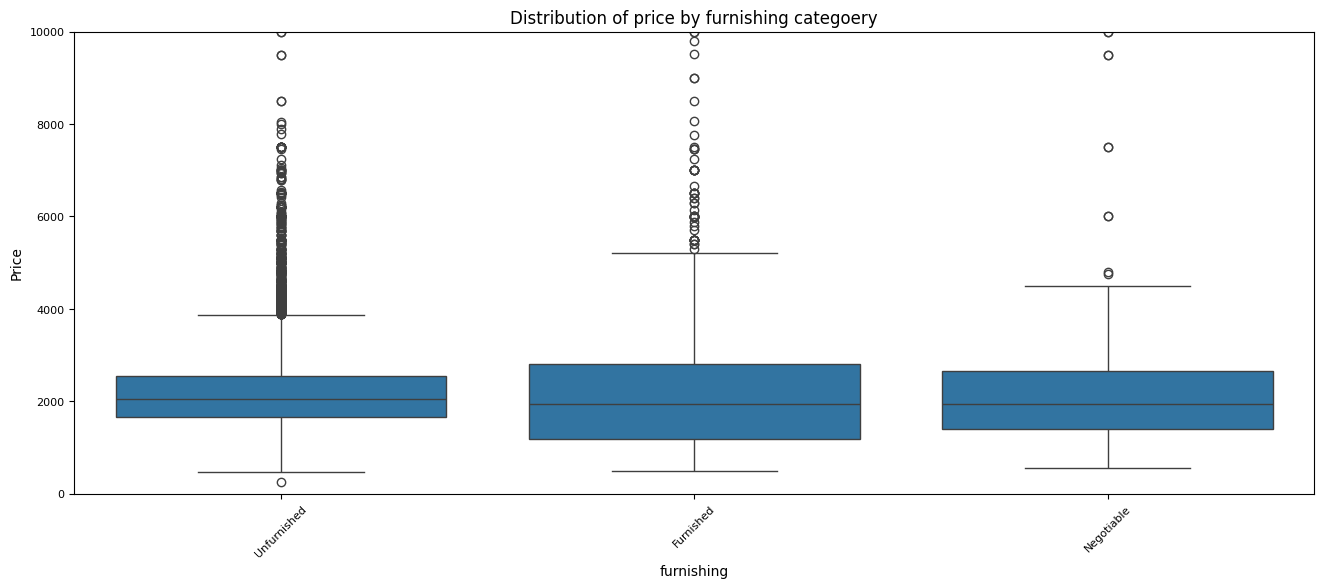

In [10]:
plt.figure(figsize = (16,6))

ax = sns.boxplot(data=rent_df, x='furnishing', y='price') 

# Add Title
ax.set_title(f'Distribution of price by furnishing categoery')

# Adjust the ticks label size
ax.tick_params(axis='x', labelrotation=45, labelsize = 8)
ax.tick_params(axis='y', labelsize = 8)

# Set the axis labels 
ax.set_xlabel('furnishing',fontsize = 10)
ax.set_ylabel('Price',fontsize = 10)

# Zooming in to removed outliers
ax.set_ylim(0,10000)

# Show plot
plt.show()

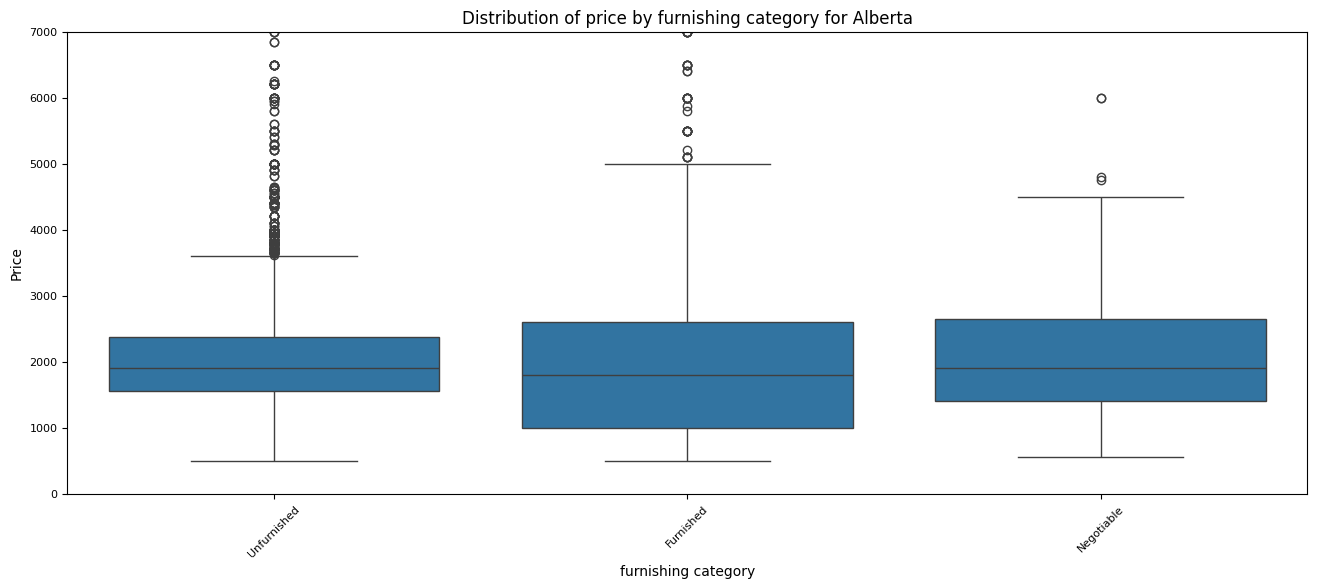

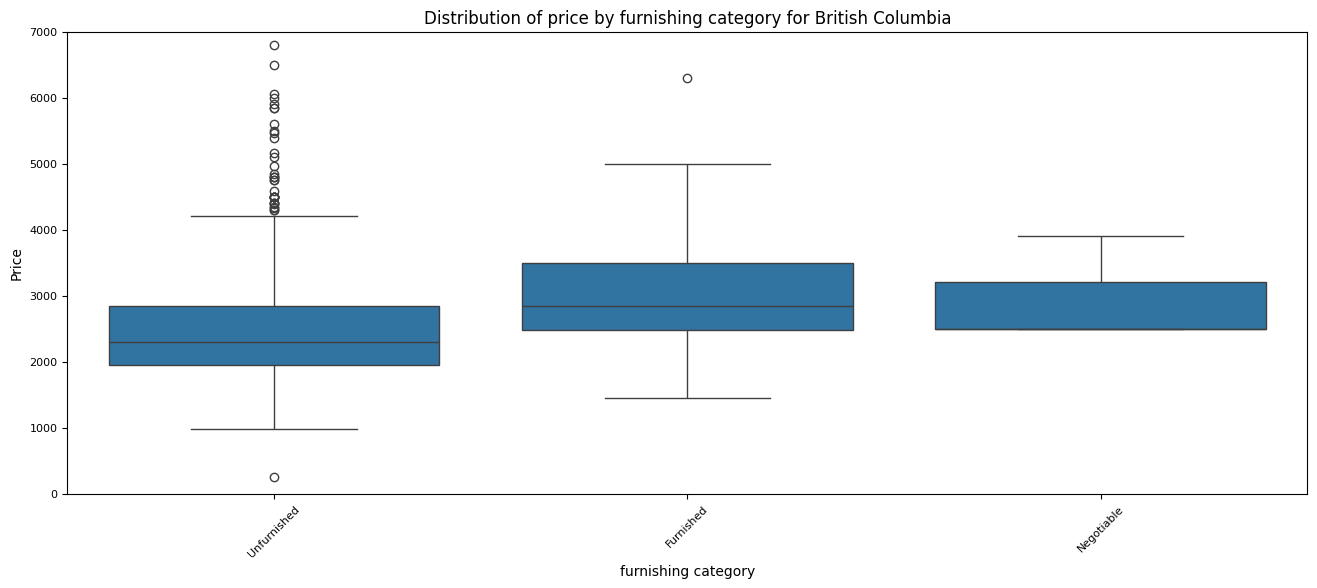

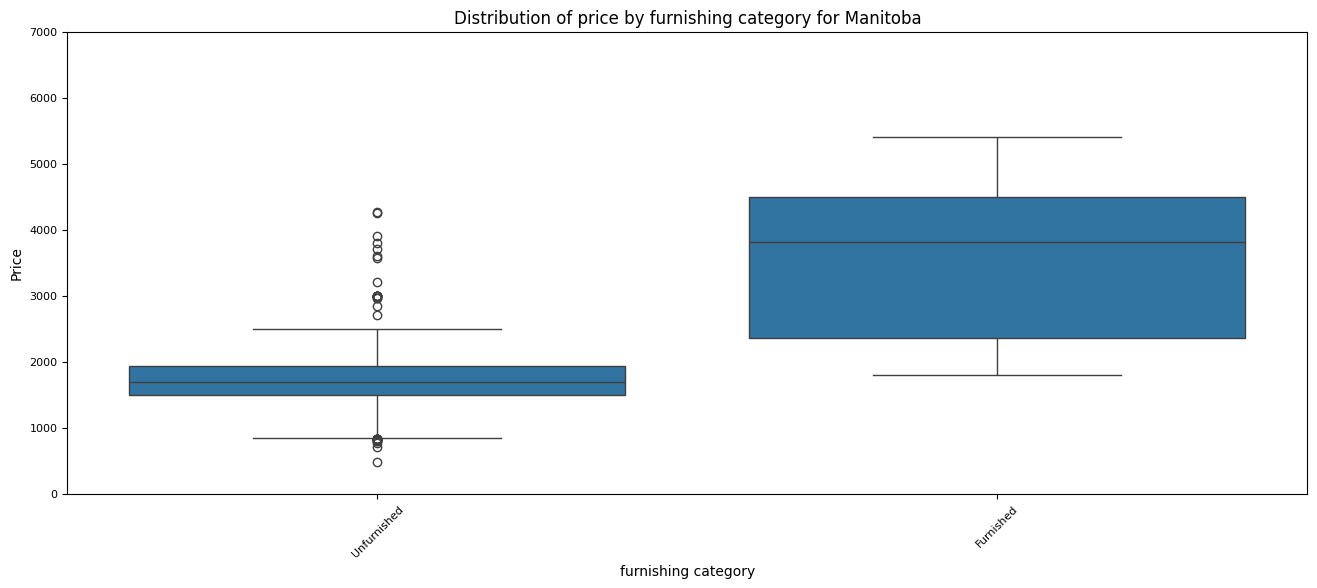

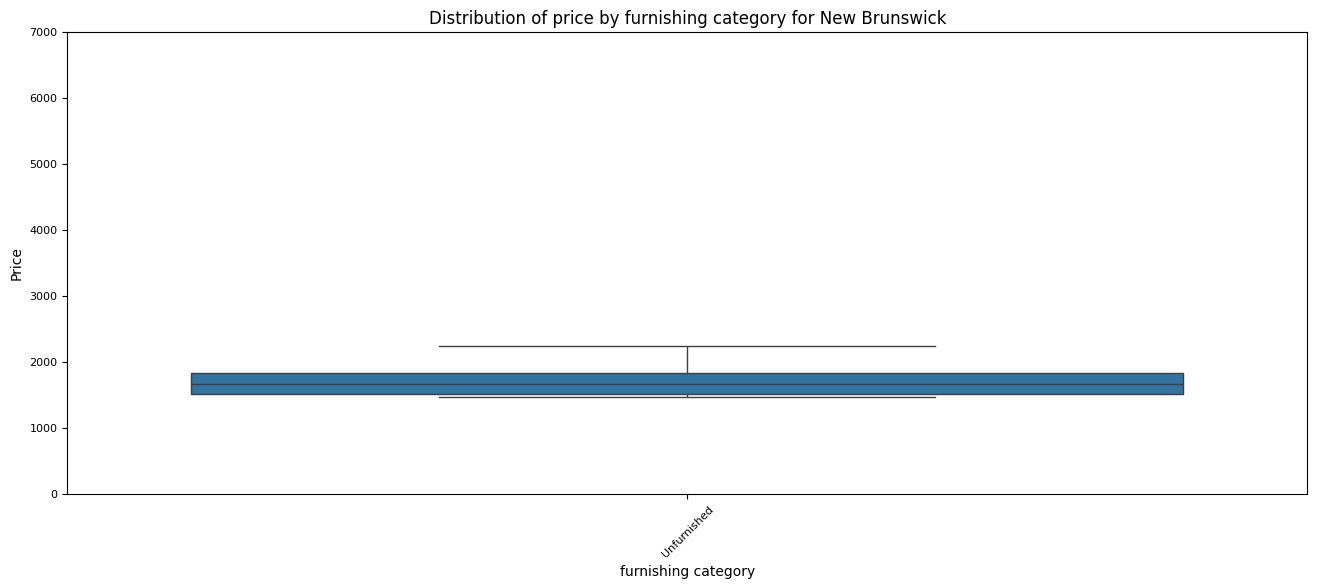

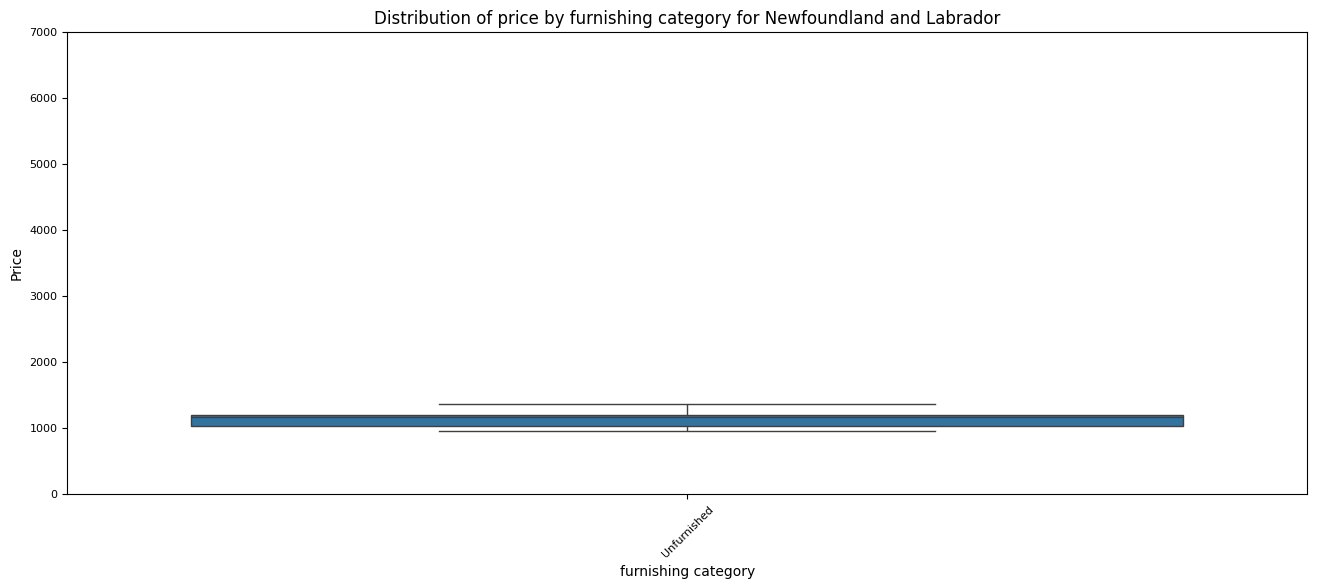

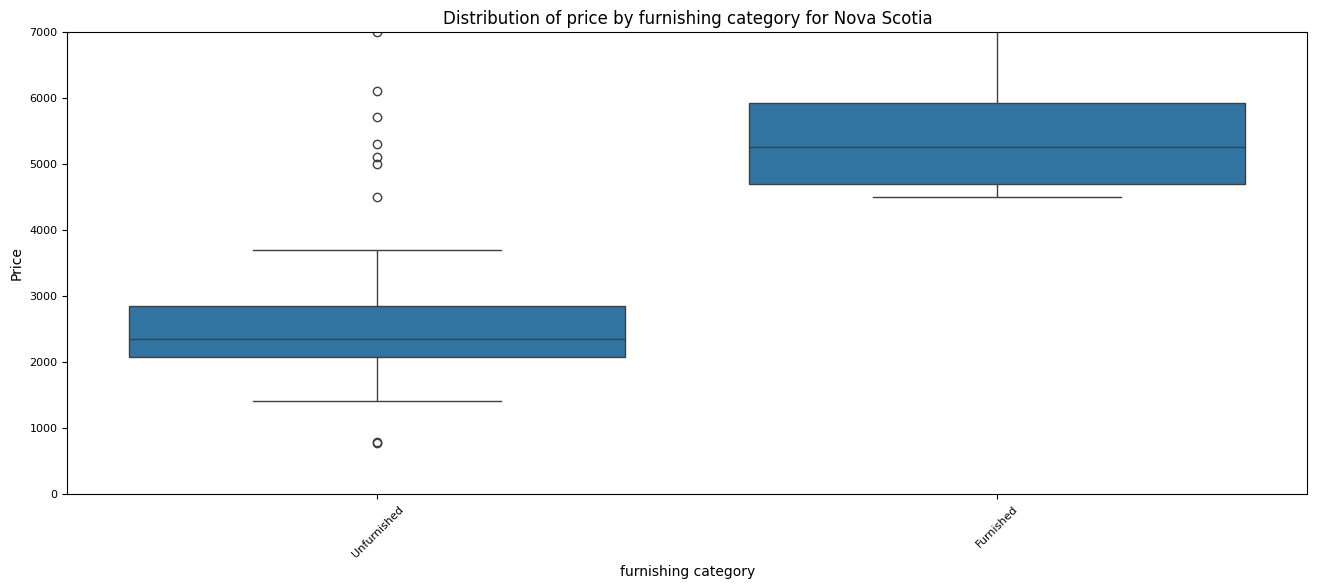

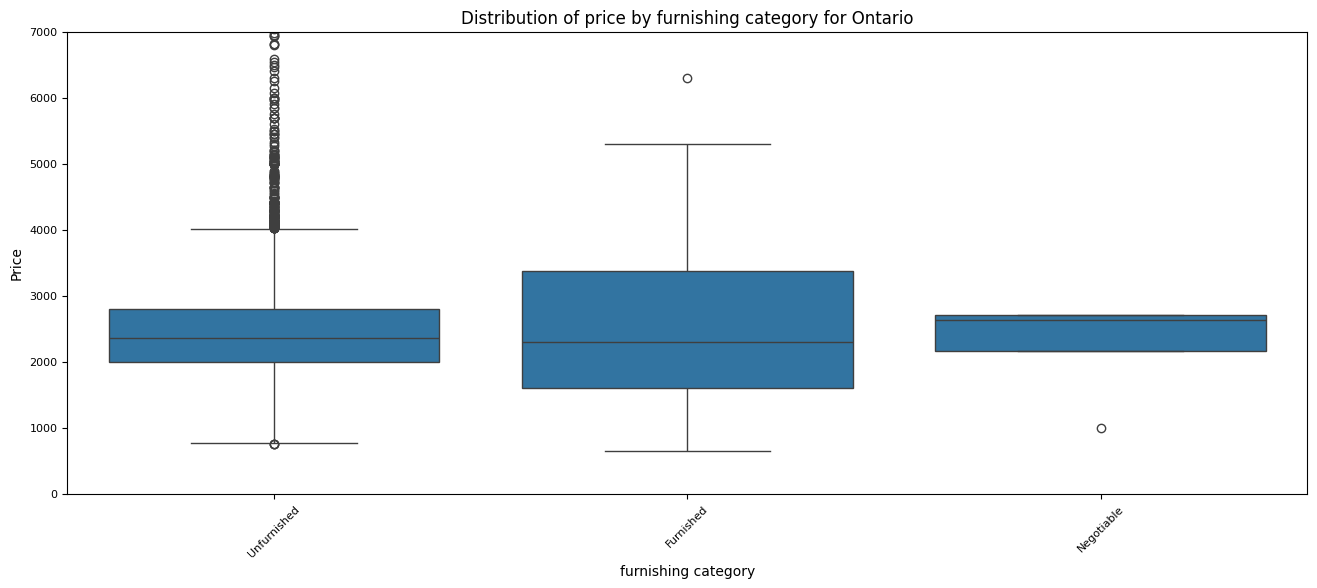

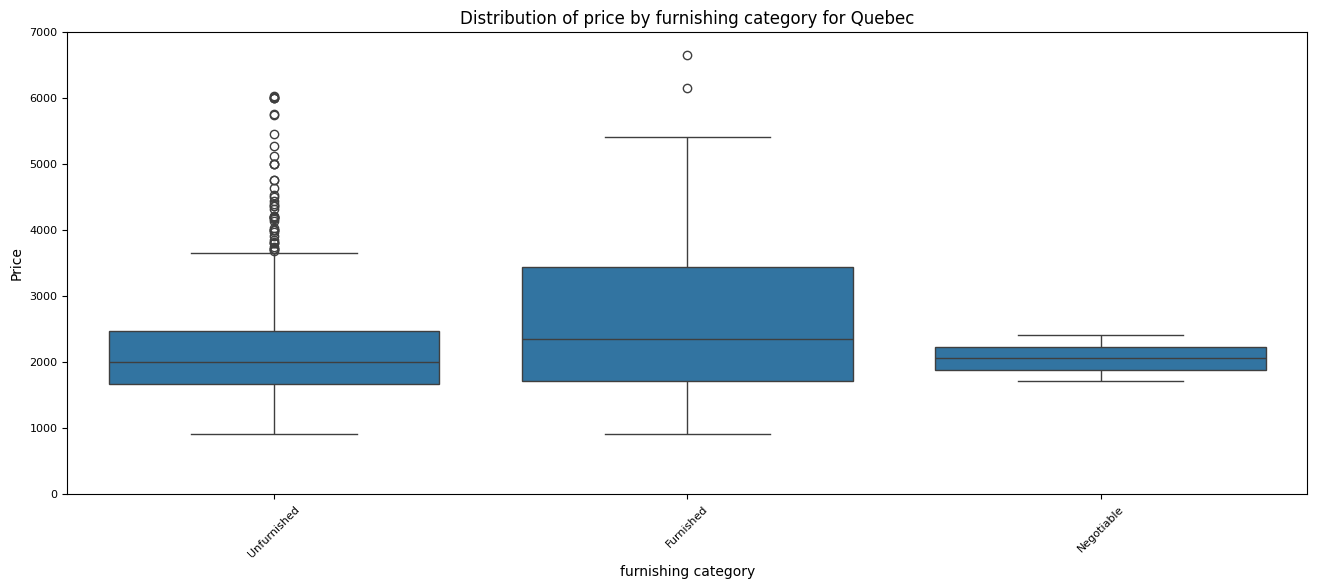

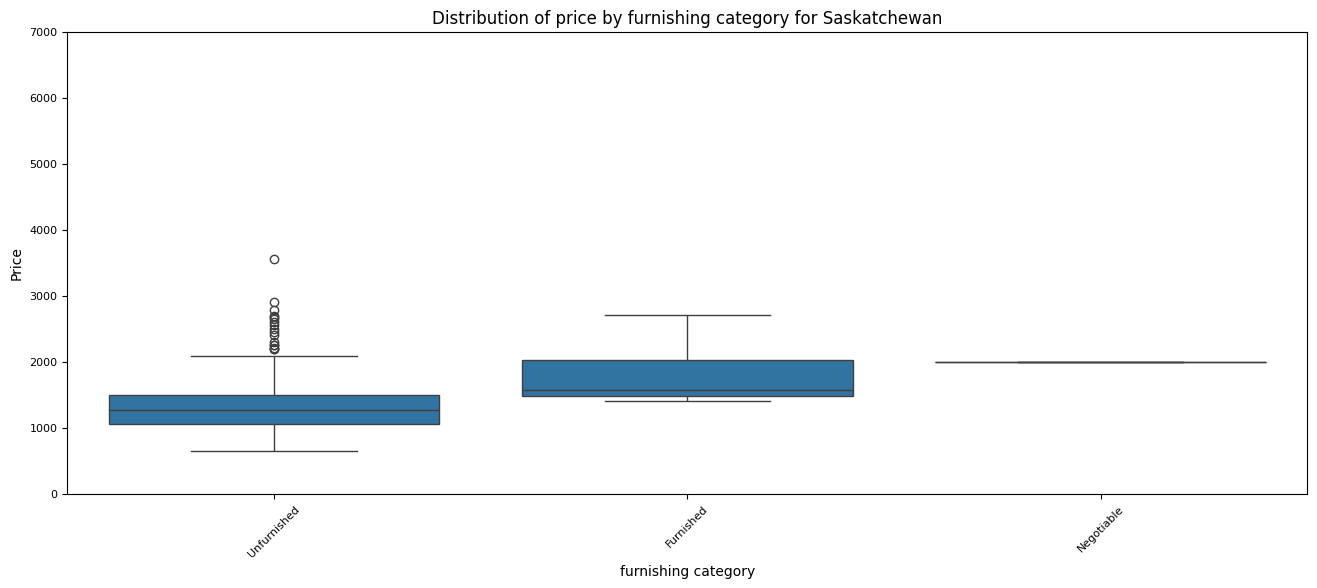

In [11]:
for province in rent_df['province'].unique() :
    plt.figure(figsize = (16,6))

    ax = sns.boxplot(data=rent_df[rent_df['province'] == province], x='furnishing', y='price') 
    
    # Add Title
    ax.set_title(f'Distribution of price by furnishing category for {province}')

    # Adjust the ticks label size
    ax.tick_params(axis='x', labelrotation=45, labelsize = 8)
    ax.tick_params(axis='y', labelsize = 8)

    # Set the axis labels 
    ax.set_xlabel('furnishing category',fontsize = 10)
    ax.set_ylabel('Price',fontsize = 10)

    # Zooming in to removed outliers
    ax.set_ylim(0,7000)

    # Show plot
    plt.show()

**Price vs # of bedrooms**

The number of bedrooms will be a strong predictor of the price

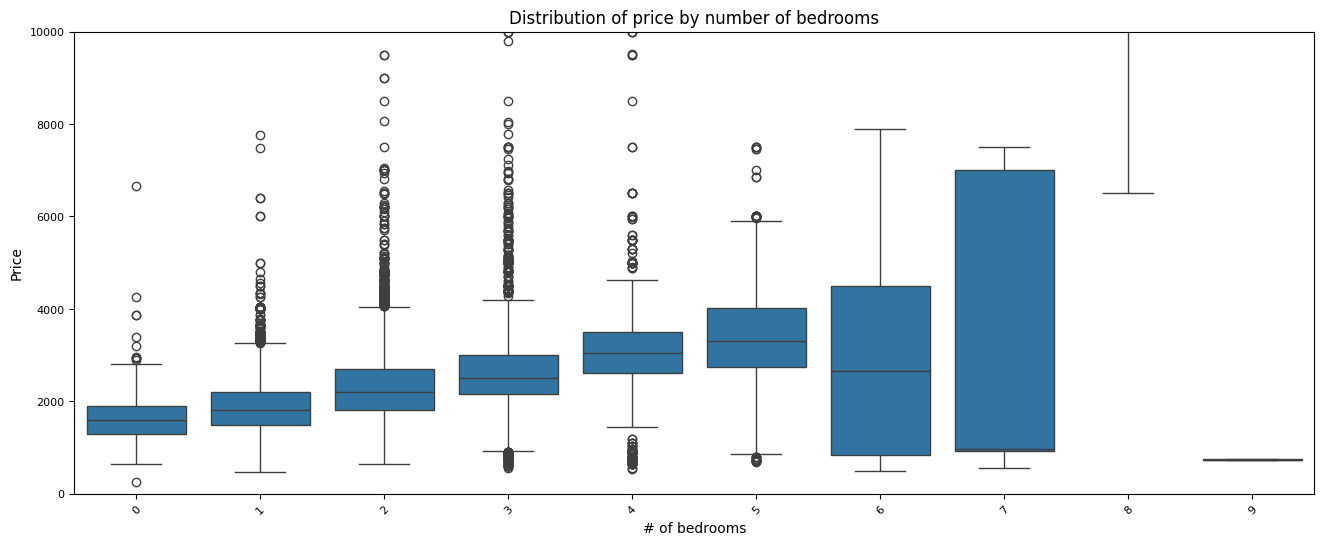

In [12]:
plt.figure(figsize = (16,6))

ax = sns.boxplot(data=rent_df, x='beds', y='price') 
# Add Title
ax.set_title(f'Distribution of price by number of bedrooms')

# Adjust the ticks label size
ax.tick_params(axis='x', labelrotation=45, labelsize = 8)
ax.tick_params(axis='y', labelsize = 8)

# Set the axis labels 
ax.set_xlabel('# of bedrooms',fontsize = 10)
ax.set_ylabel('Price',fontsize = 10)

# Zooming in to removed outliers
ax.set_ylim(0,10000)

# Show plot
plt.show()

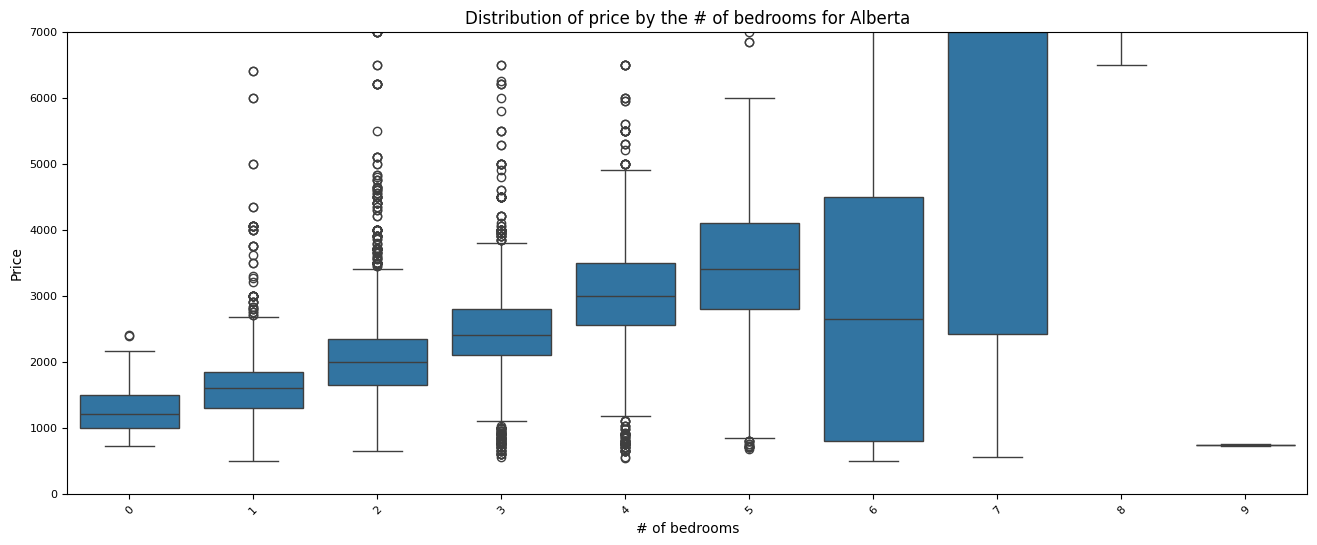

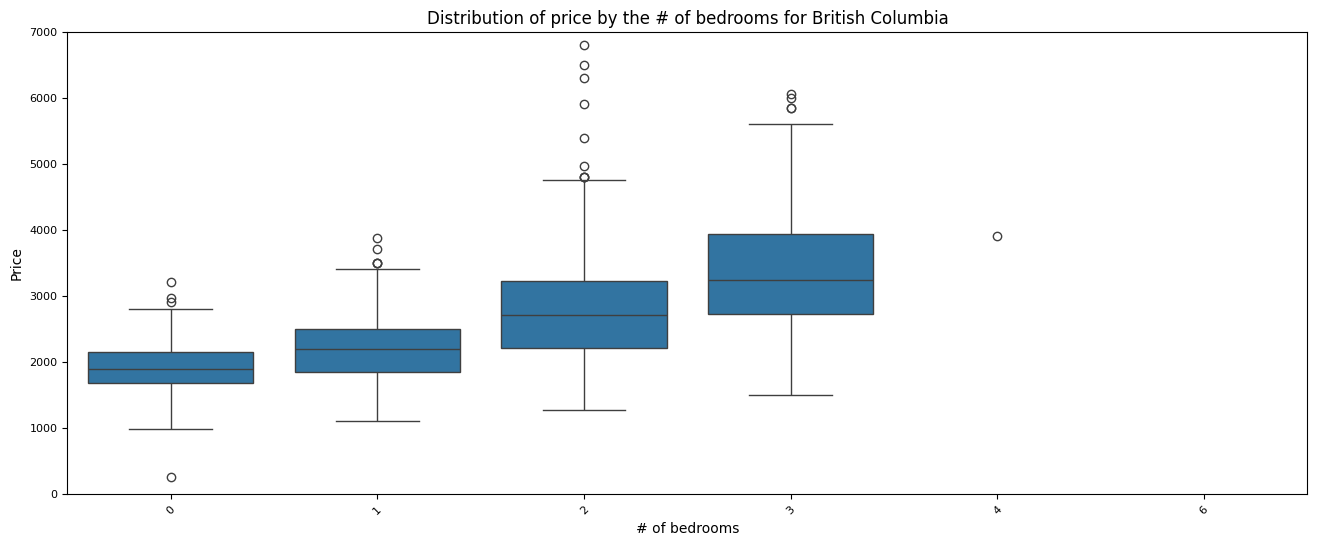

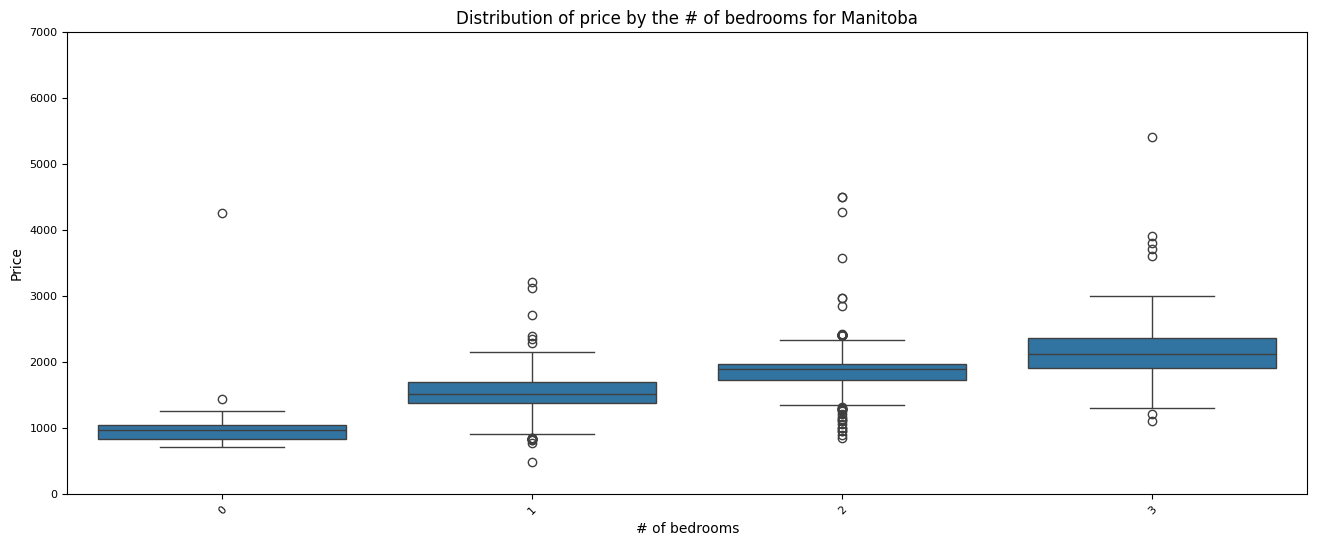

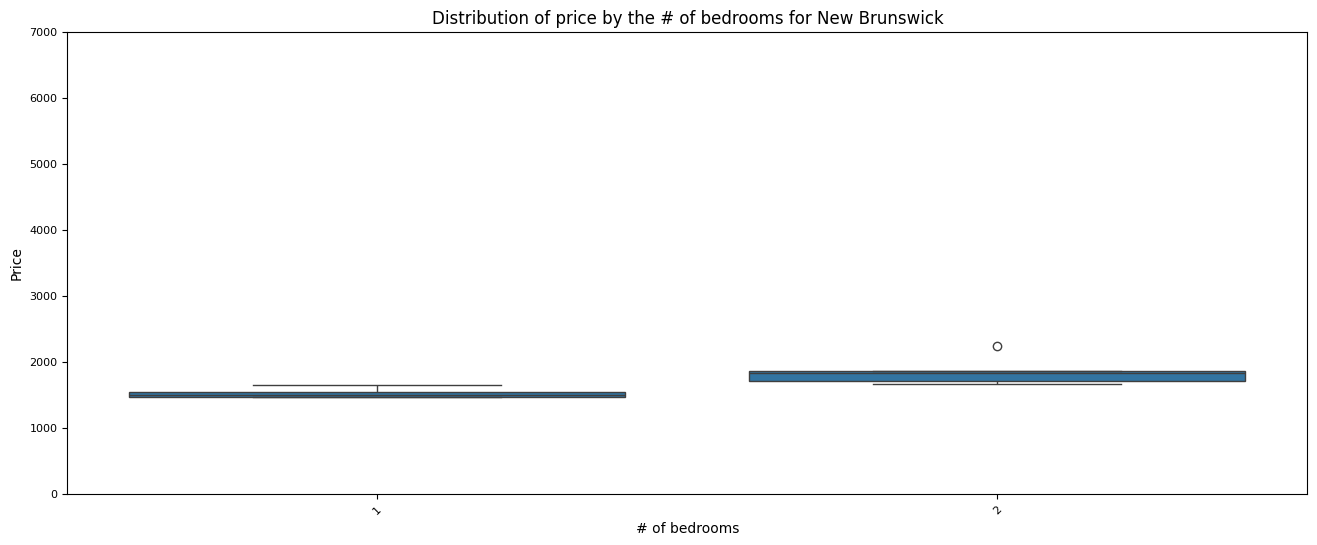

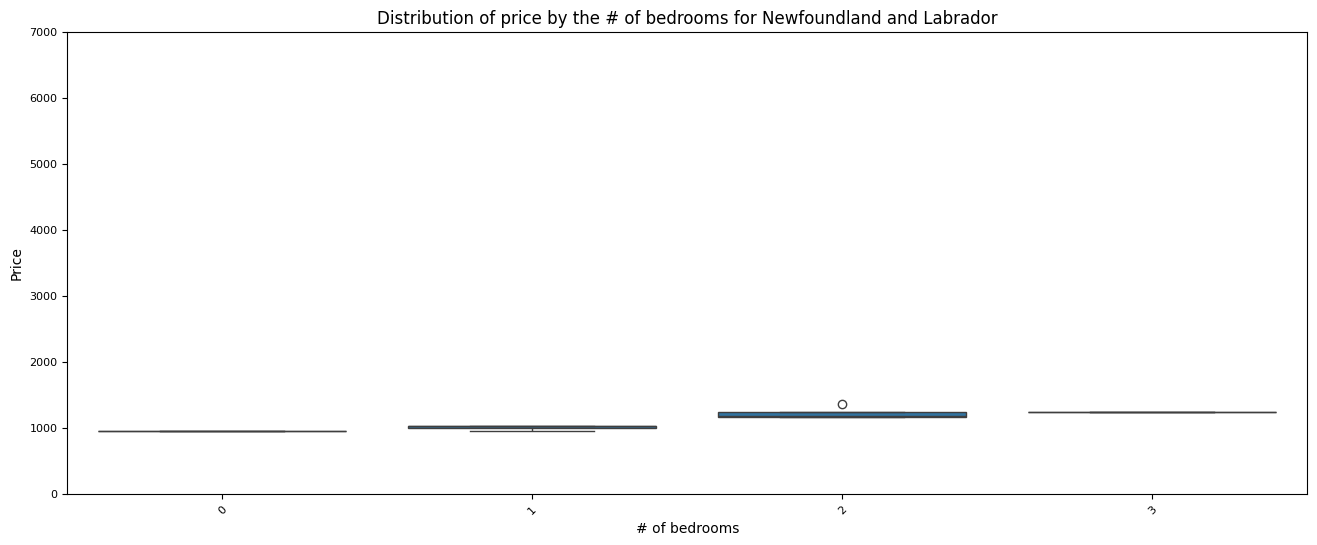

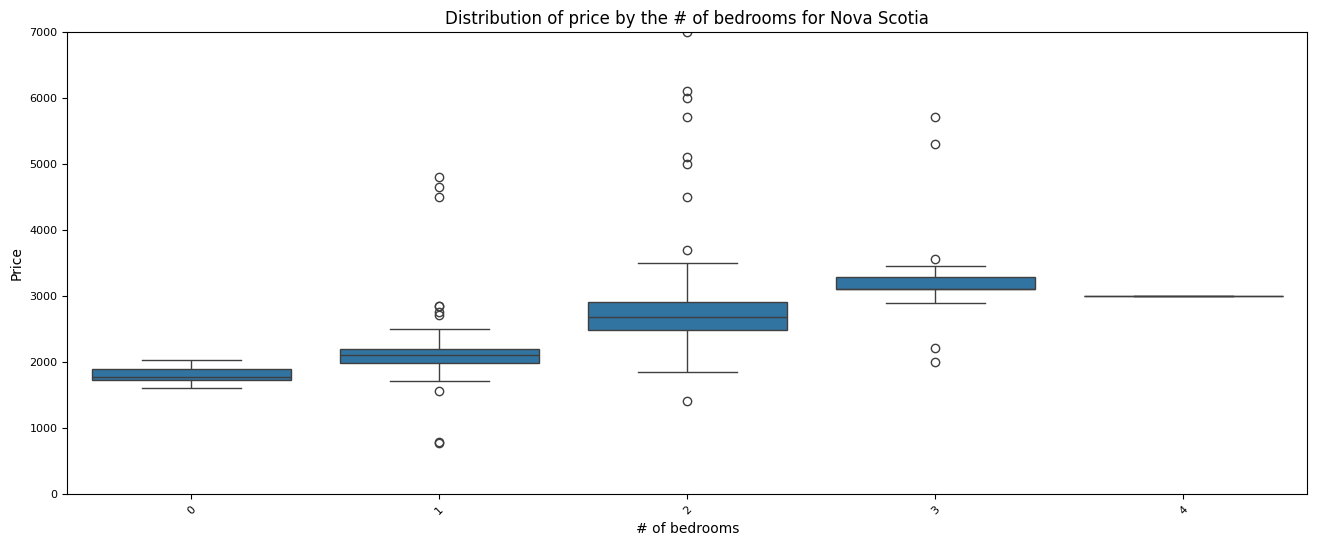

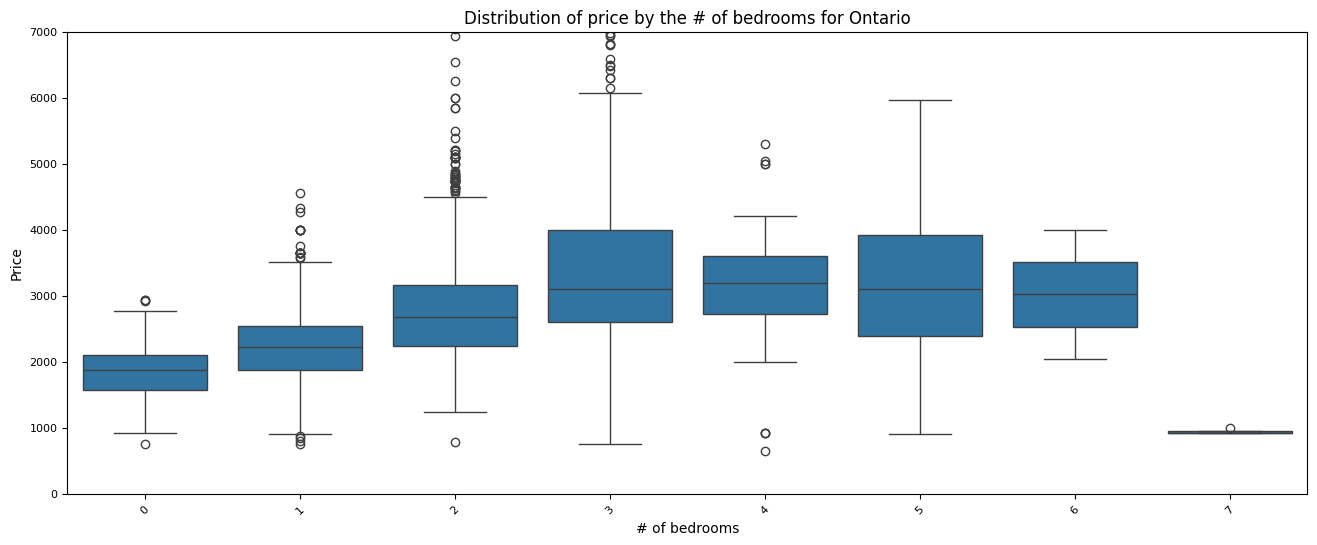

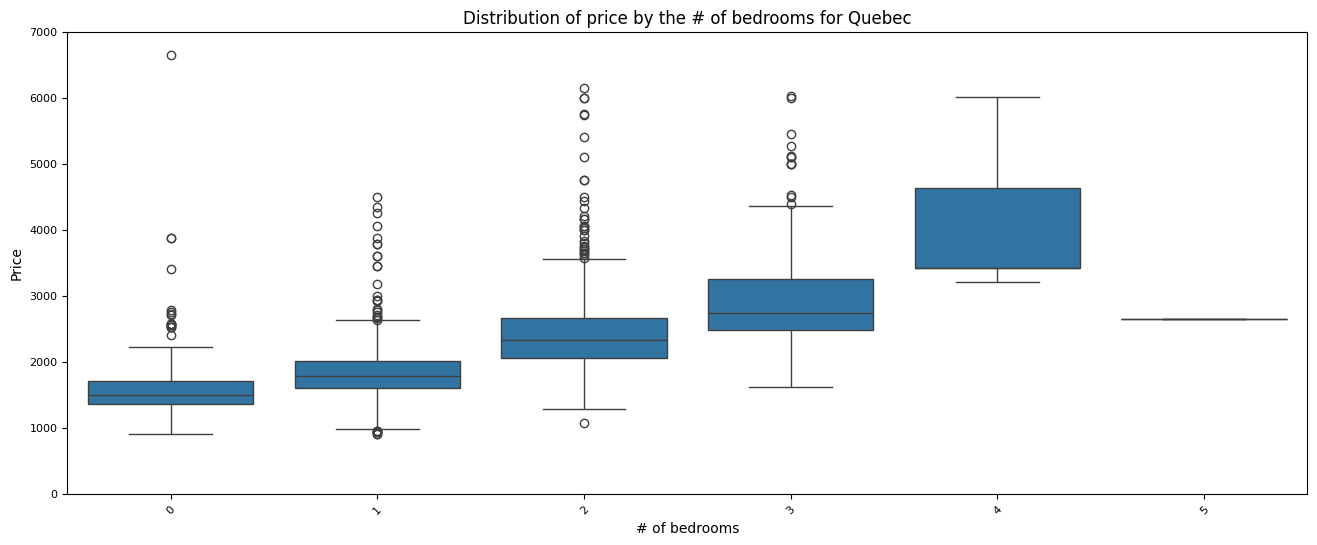

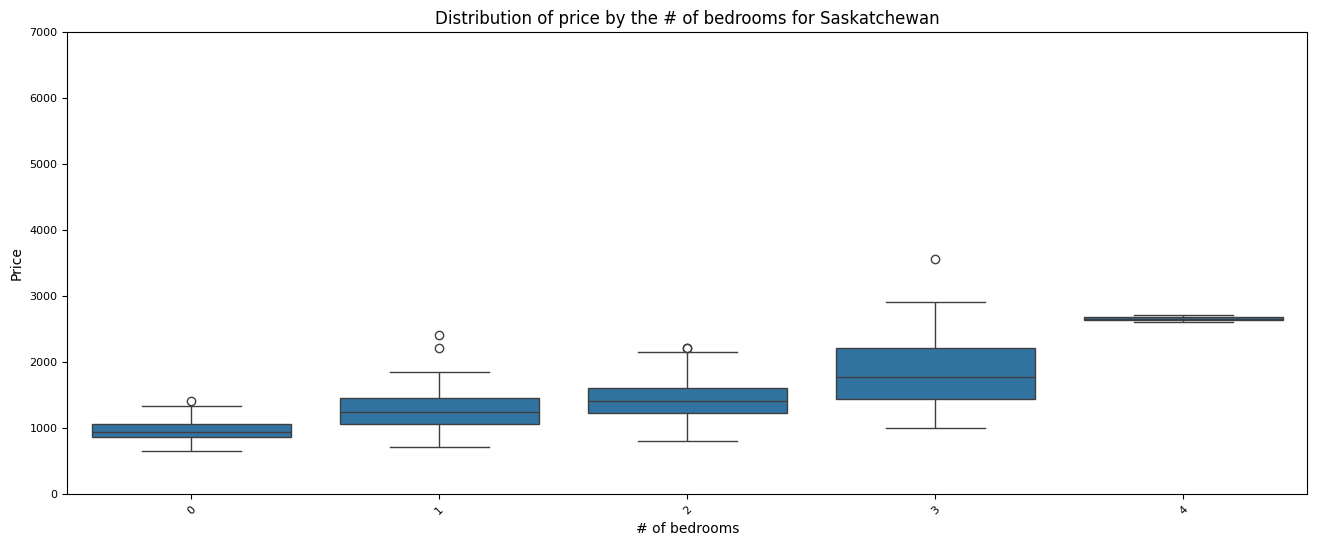

In [13]:
for province in rent_df['province'].unique() :
    plt.figure(figsize = (16,6))

    ax = sns.boxplot(data=rent_df[rent_df['province'] == province], x='beds', y='price') 
    
    # Add Title
    ax.set_title(f'Distribution of price by the # of bedrooms for {province}')

    # Adjust the ticks label size
    ax.tick_params(axis='x', labelrotation=45, labelsize = 8)
    ax.tick_params(axis='y', labelsize = 8)

    # Set the axis labels 
    ax.set_xlabel('# of bedrooms',fontsize = 10)
    ax.set_ylabel('Price',fontsize = 10)

    # Zooming in to removed outliers
    ax.set_ylim(0,7000)

    # Show plot
    plt.show()

**Price vs sq_feet**

The square footage is also a good predictor

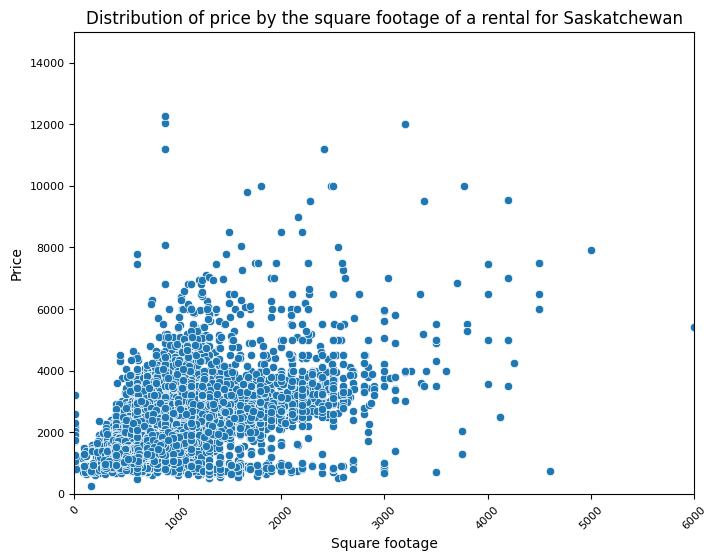

In [14]:
plt.figure(figsize = (8,6))

ax = sns.scatterplot(data=rent_df, x="sq_feet", y="price")

# Add Title
ax.set_title(f'Distribution of price by the square footage of a rental over Canada')

# Adjust the ticks label size
ax.tick_params(axis='x', labelrotation=45, labelsize = 8)
ax.tick_params(axis='y', labelsize = 8)

# Set the axis labels 
ax.set_xlabel('Square footage',fontsize = 10)
ax.set_ylabel('Price',fontsize = 10)

# Zooming in to removed outliers
ax.set_ylim(0, 15000)
ax.set_xlim(0,6000)

plt.show()

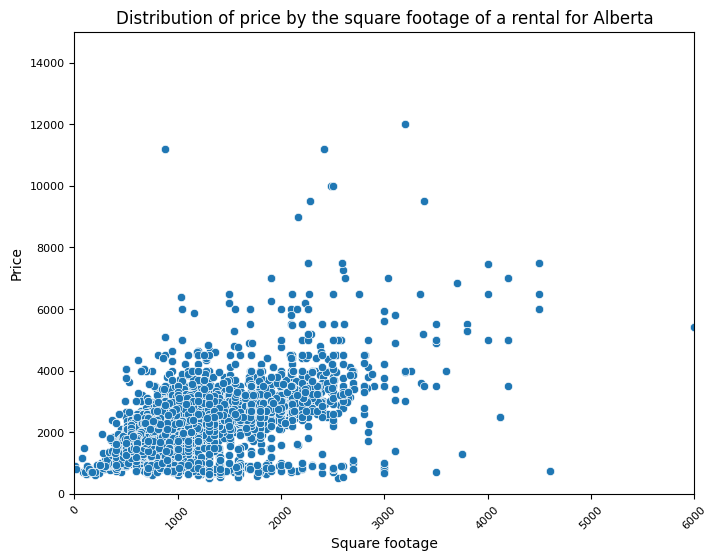

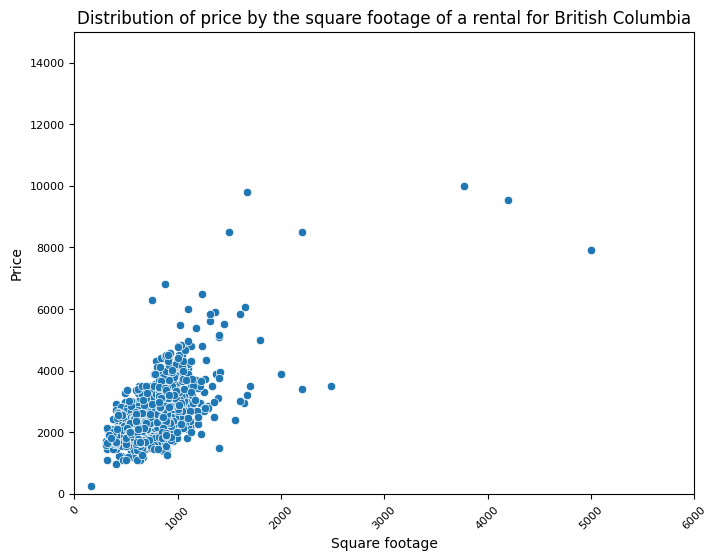

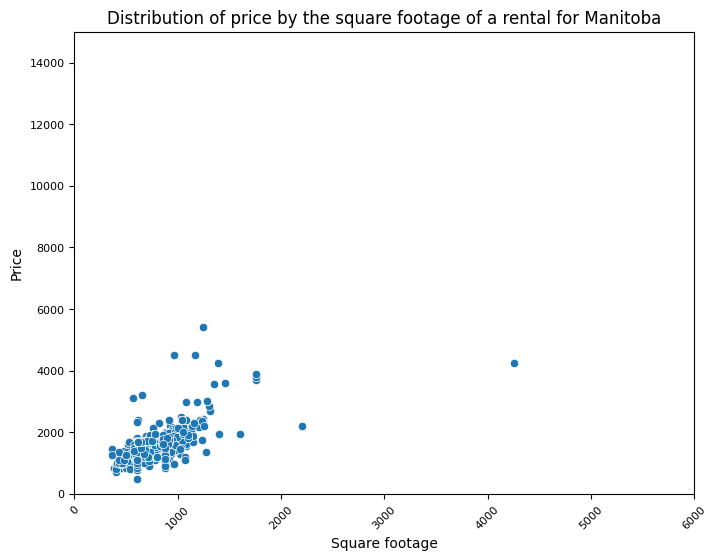

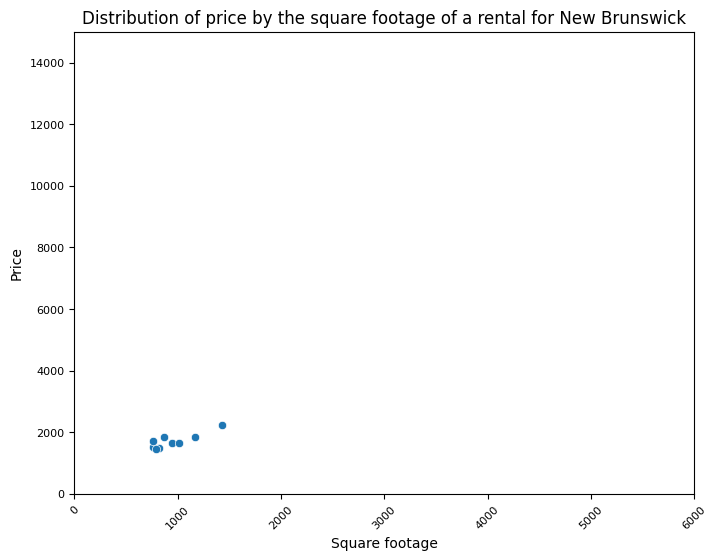

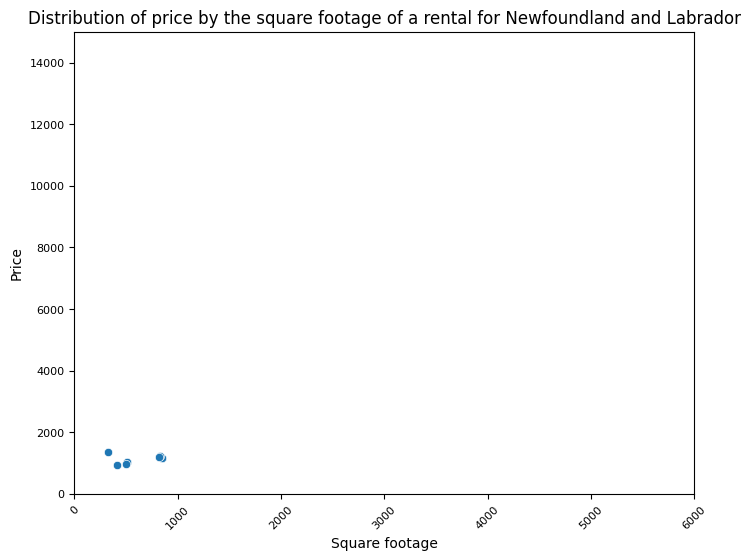

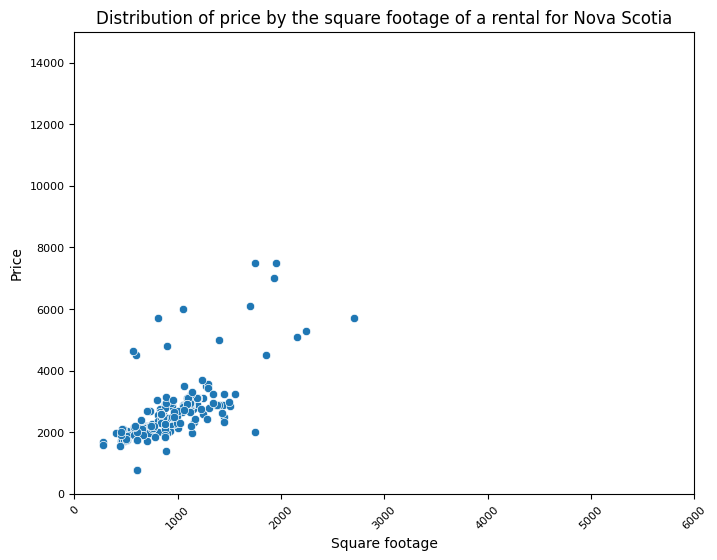

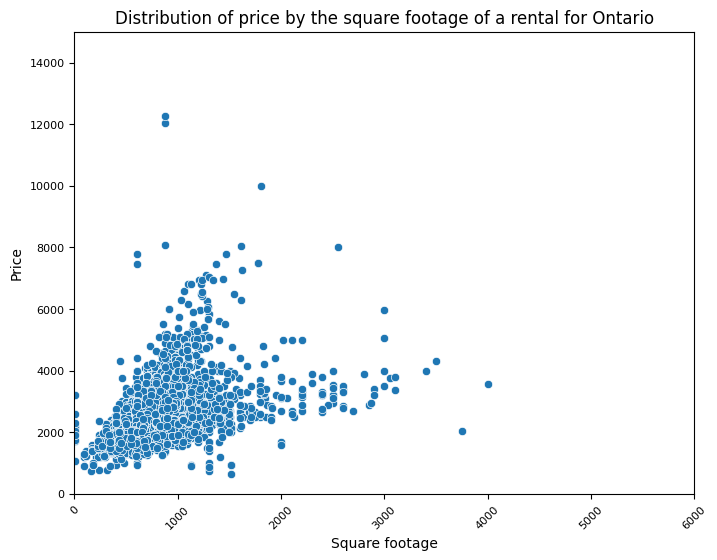

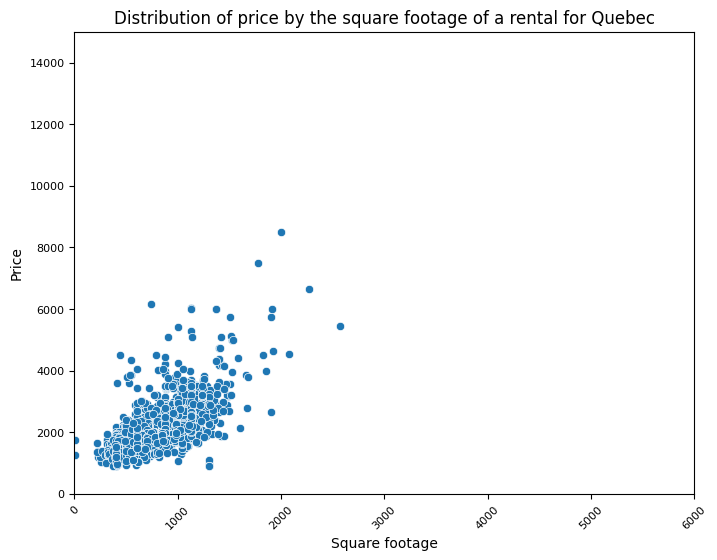

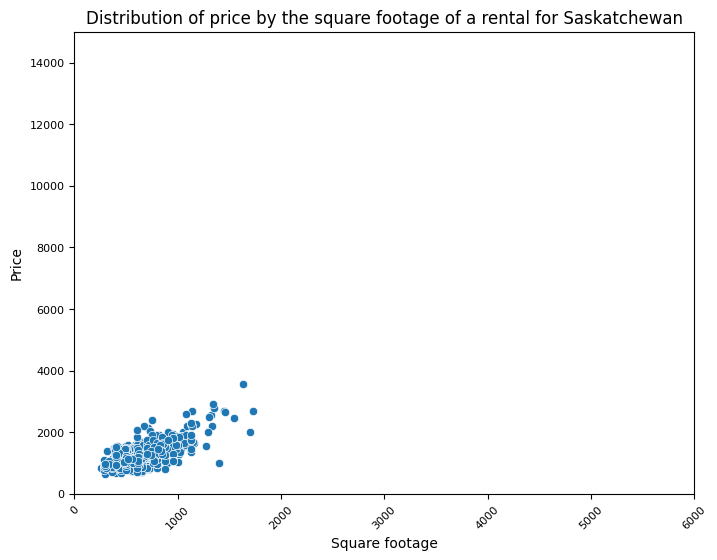

In [15]:
for province in rent_df['province'].unique() :
    plt.figure(figsize = (8,6))

    ax = sns.scatterplot(data=rent_df[rent_df['province'] == province], x='sq_feet', y='price') 
    
    # Add Title
    ax.set_title(f'Distribution of price by the square footage of a rental for {province}')

    # Adjust the ticks label size
    ax.tick_params(axis='x', labelrotation=45, labelsize = 8)
    ax.tick_params(axis='y', labelsize = 8)

    # Set the axis labels 
    ax.set_xlabel('Square footage',fontsize = 10)
    ax.set_ylabel('Price',fontsize = 10)

    # Zooming in to removed outliers
    ax.set_ylim(0, 15000)
    ax.set_xlim(0,6000)

    # Show plot
    plt.show()

Price vs City by Province

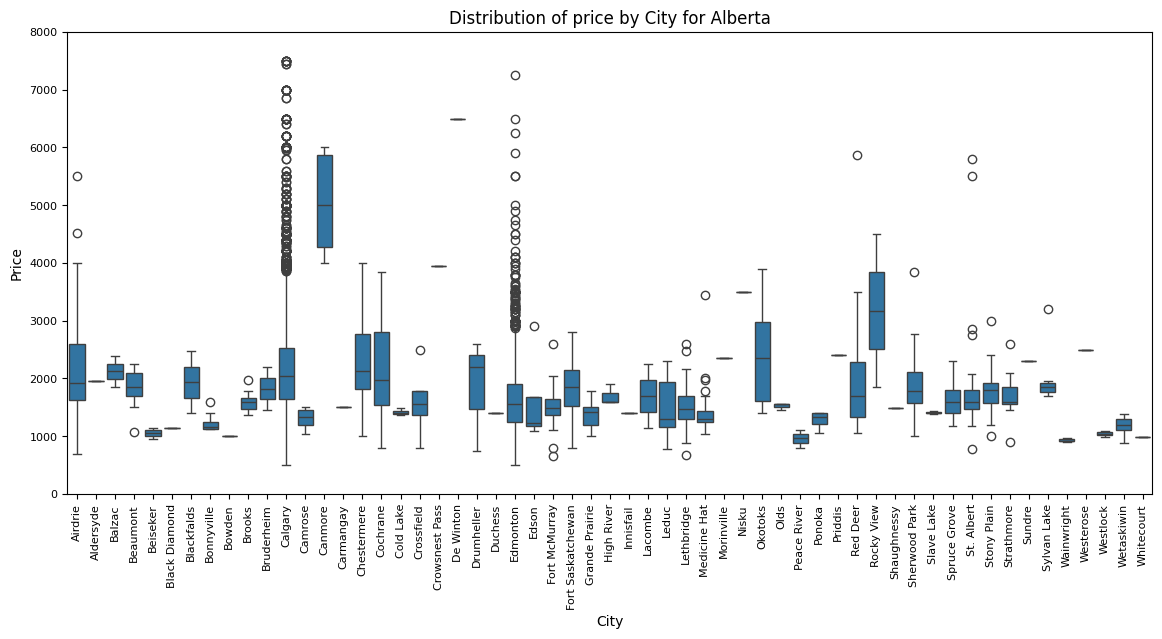

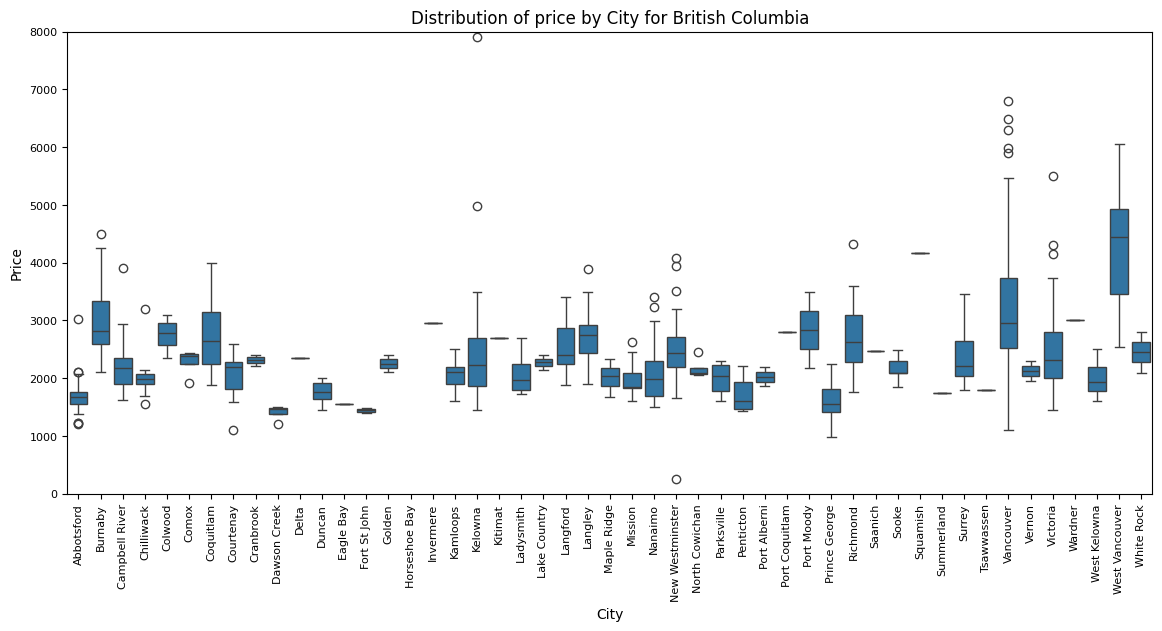

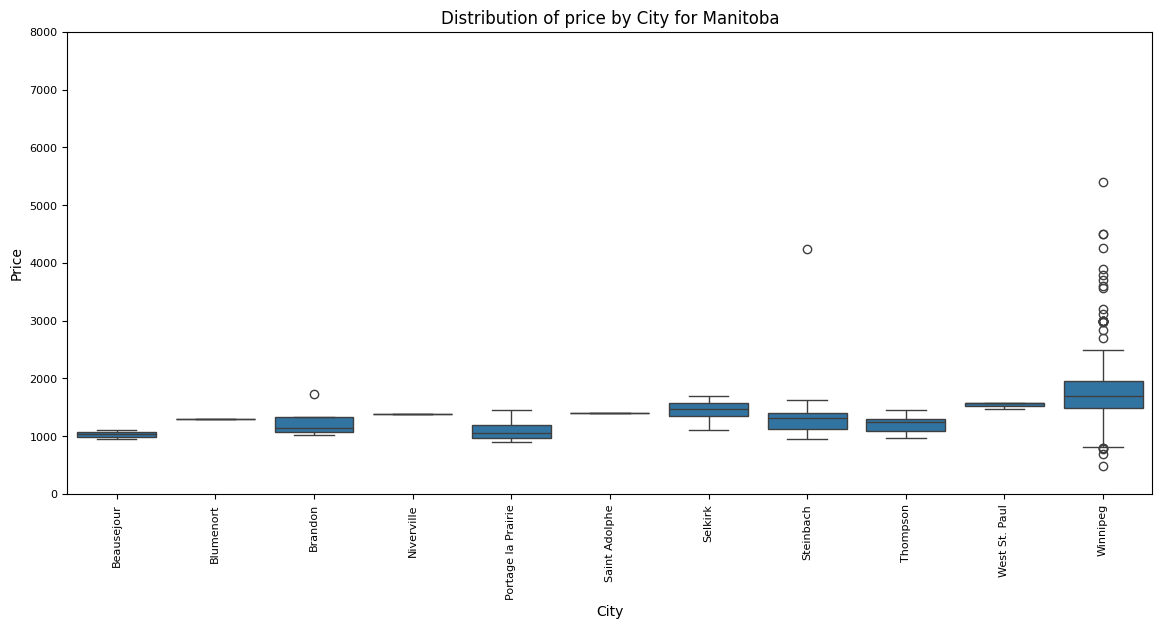

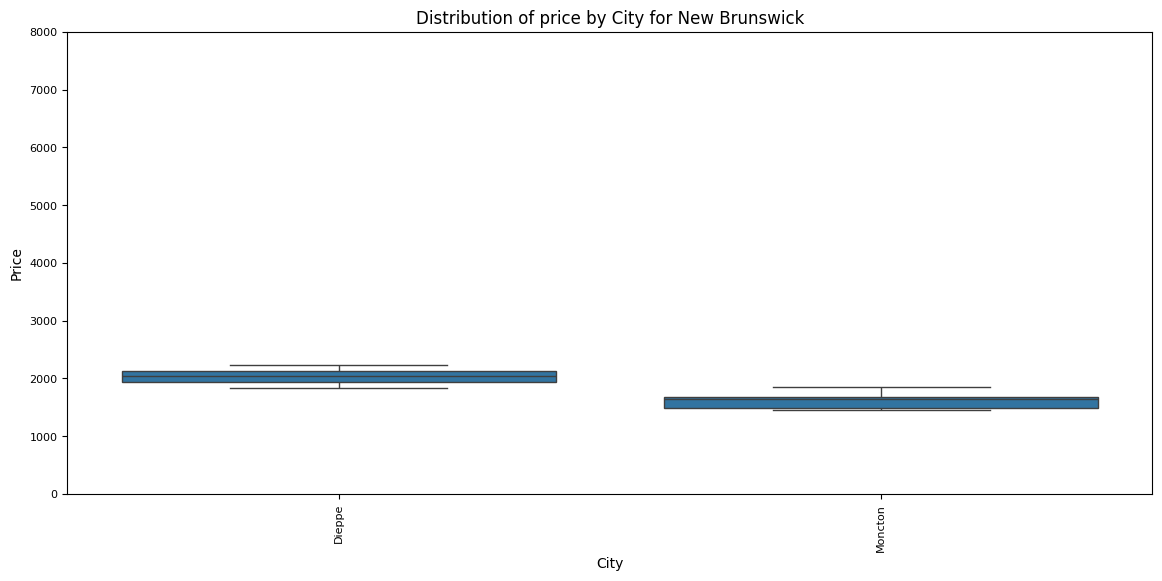

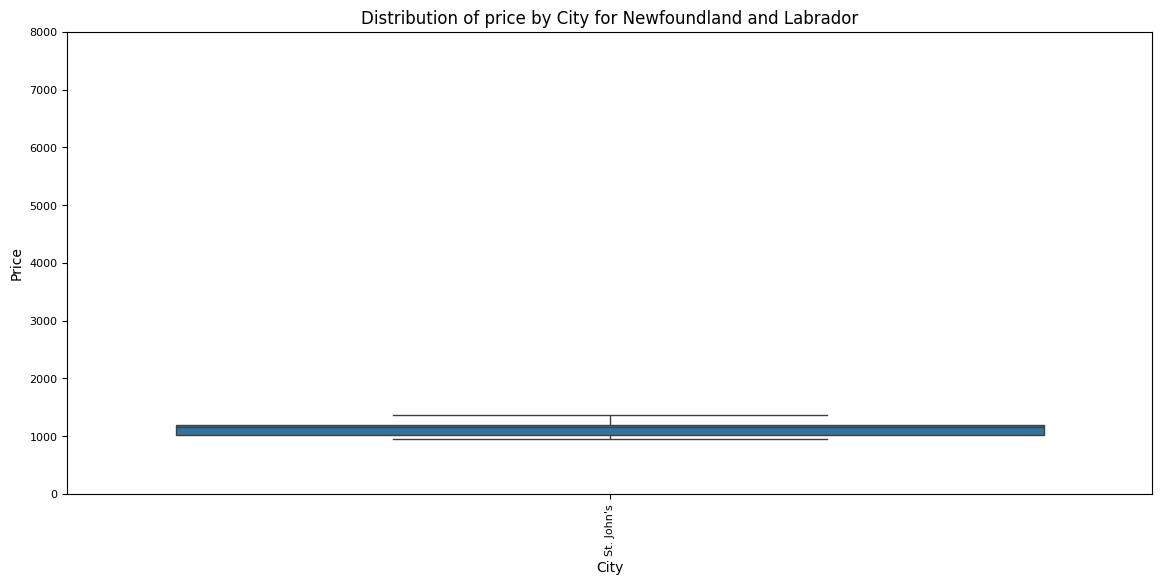

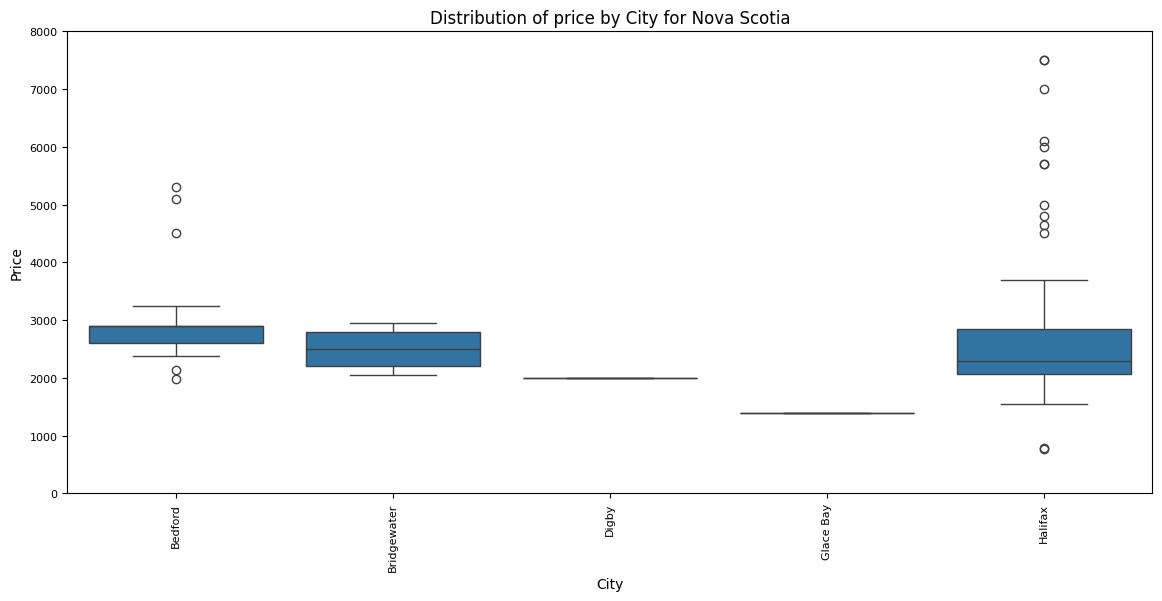

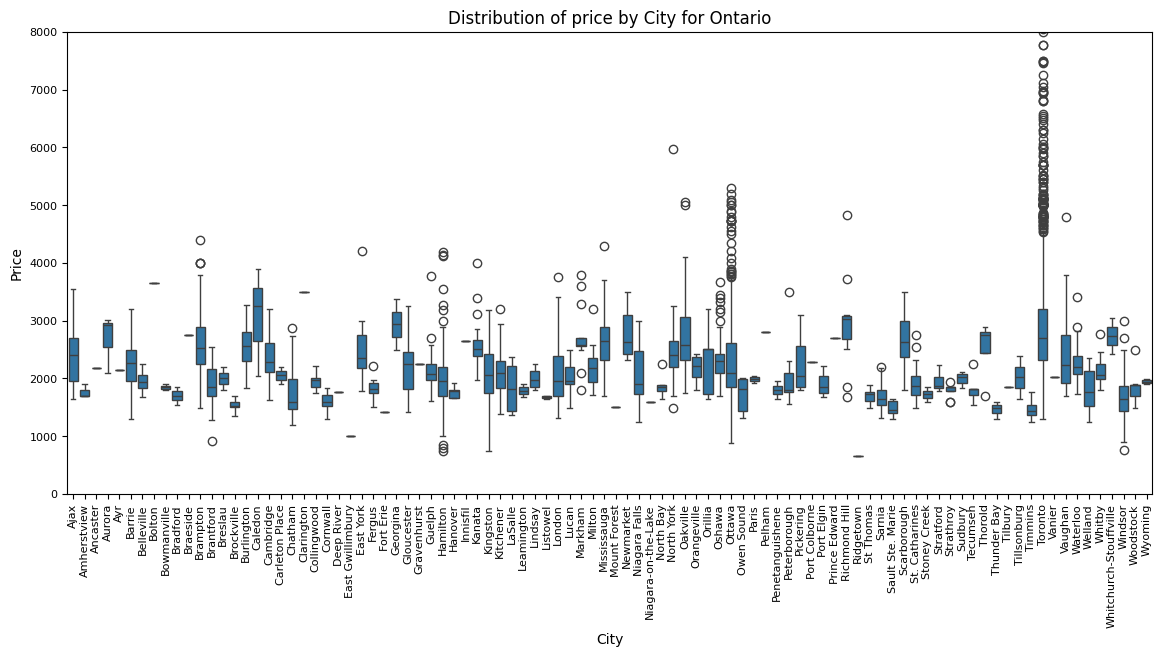

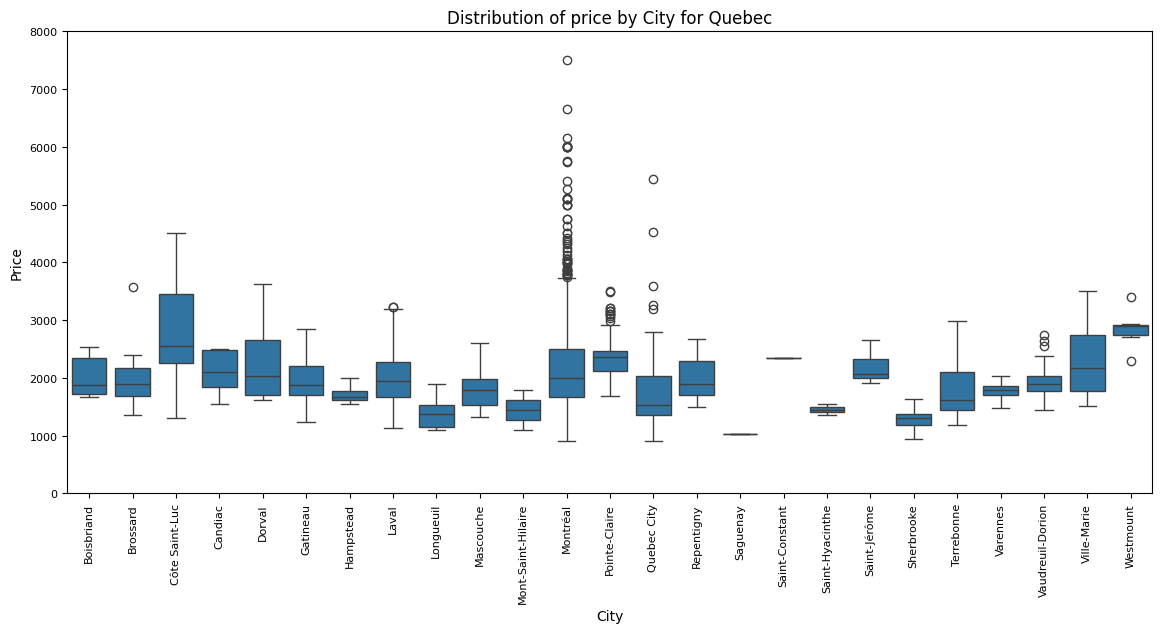

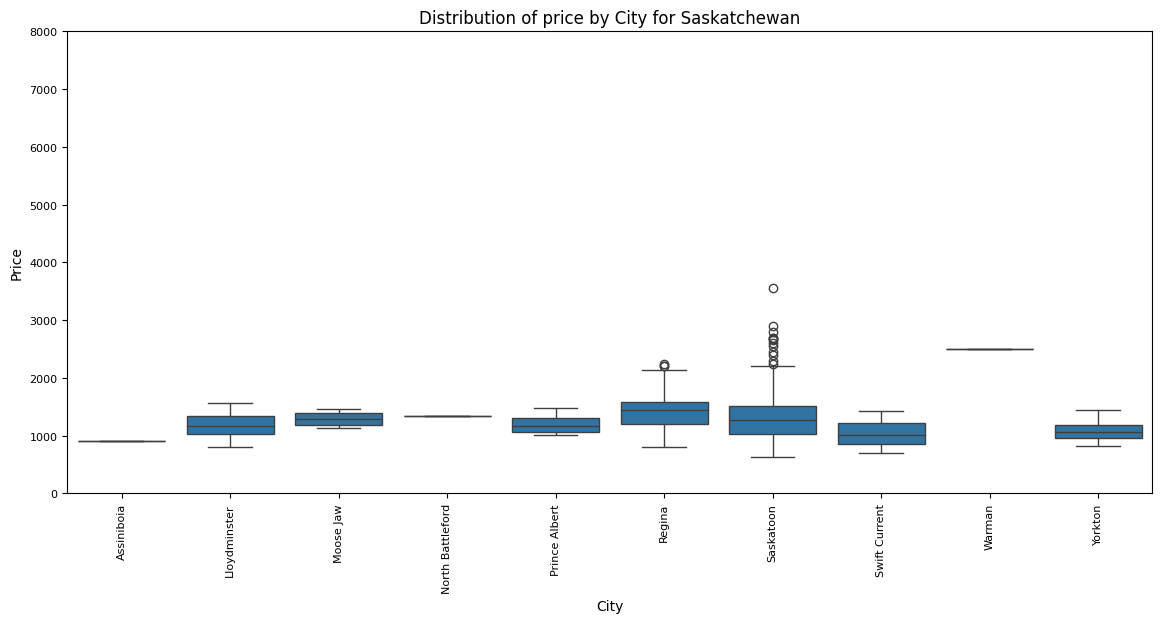

In [16]:
for province in rent_df['province'].unique() :
    plt.figure(figsize = (14,6))

    ax = sns.boxplot(data=rent_df[rent_df['province'] == province], x='city', y='price') 
    
    # Add Title
    ax.set_title(f'Distribution of price by City for {province}')

    # Adjust the ticks label size
    ax.tick_params(axis='x', labelrotation=90, labelsize = 8)
    ax.tick_params(axis='y', labelsize = 8)

    # Set the axis labels 
    ax.set_xlabel('City',fontsize = 10)
    ax.set_ylabel('Price',fontsize = 10)

    # Zooming in to removed outliers
    ax.set_ylim(0, 8000)
#    ax.set_xlim(0,6000)

    # Show plot
    plt.show()

**Price by latitute**

Conclusion the latitude impacts the price. Thus, it might be a better to use the latitude and longitude in the model, since they are numeric instaed of using the City name.

By using the City name, we would need to transform the categorical city column in a numeric column and this would create a zillon of column.

For simplificity, I will be using latitudes and longitudes in my model.

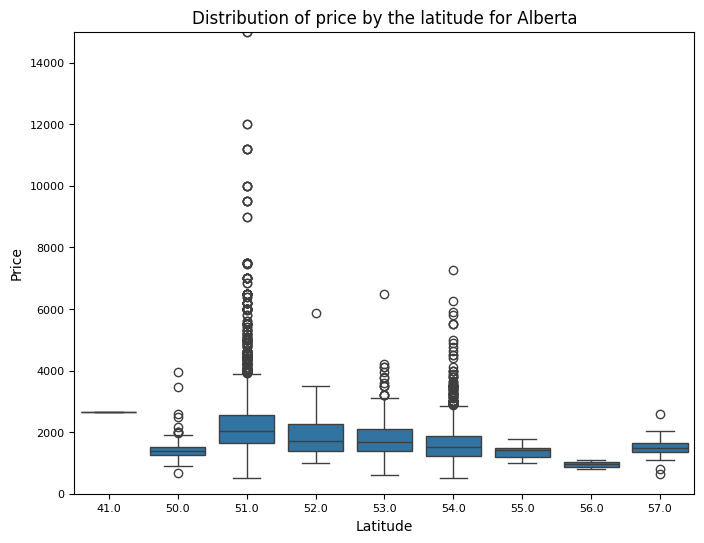

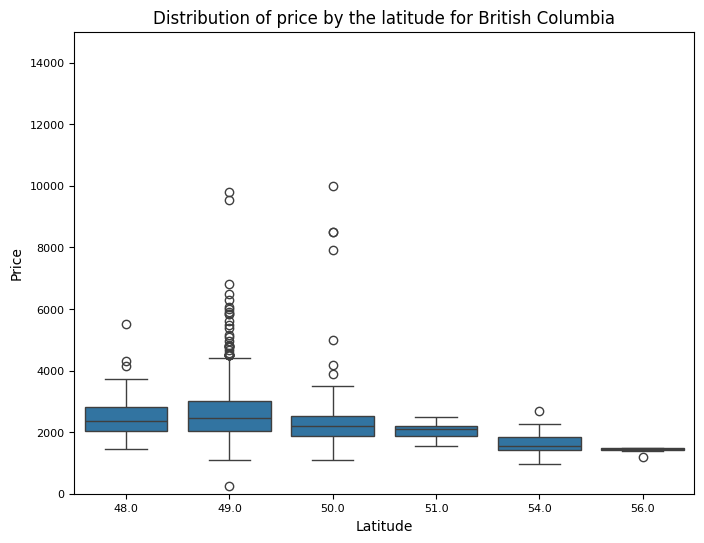

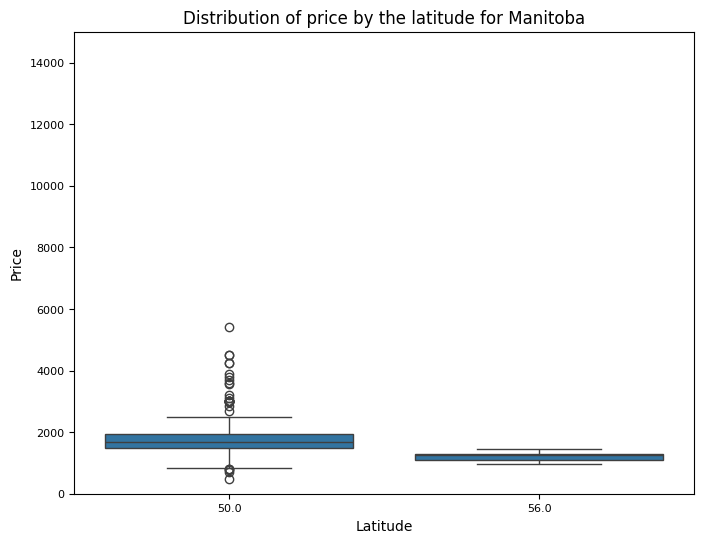

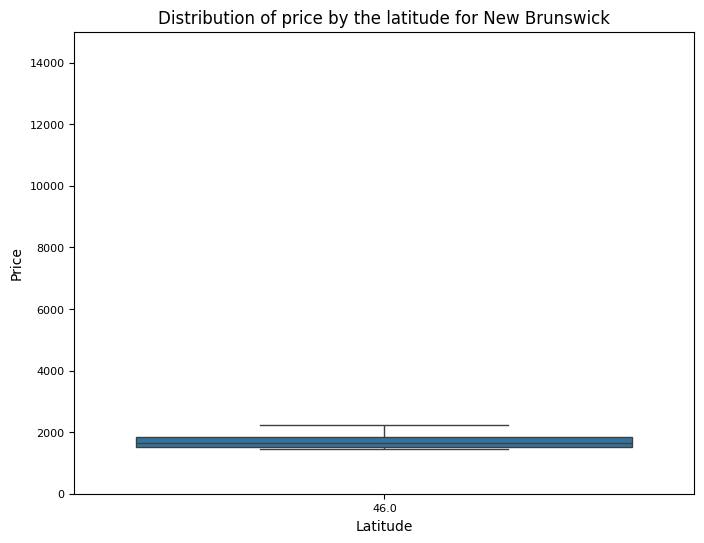

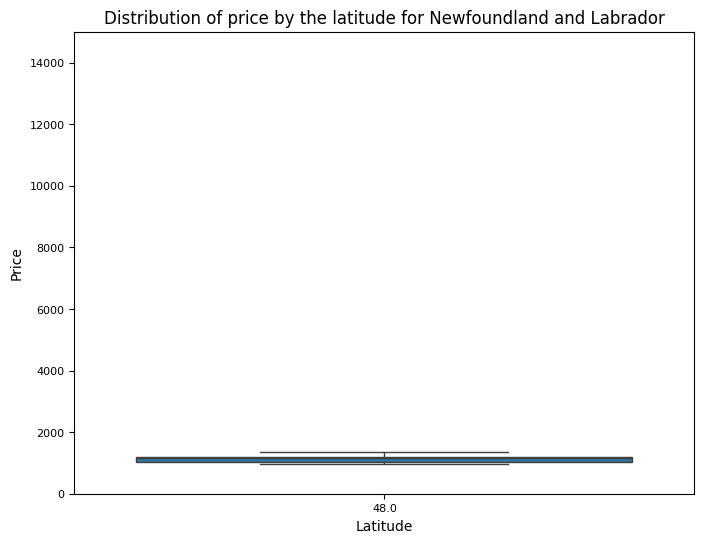

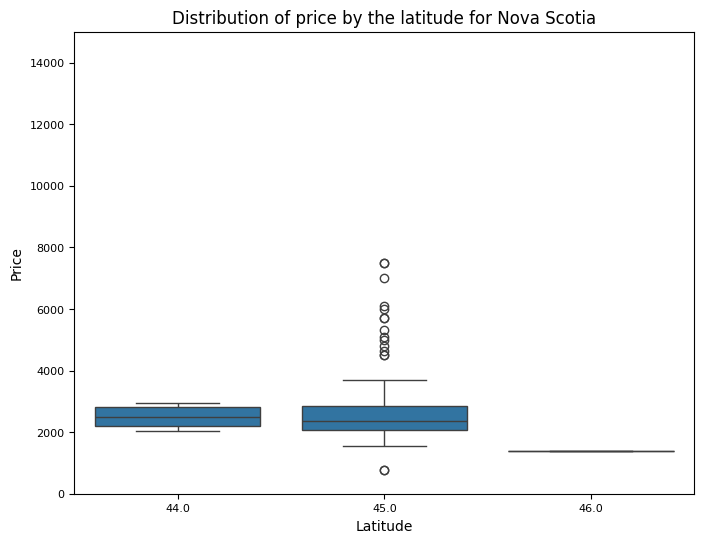

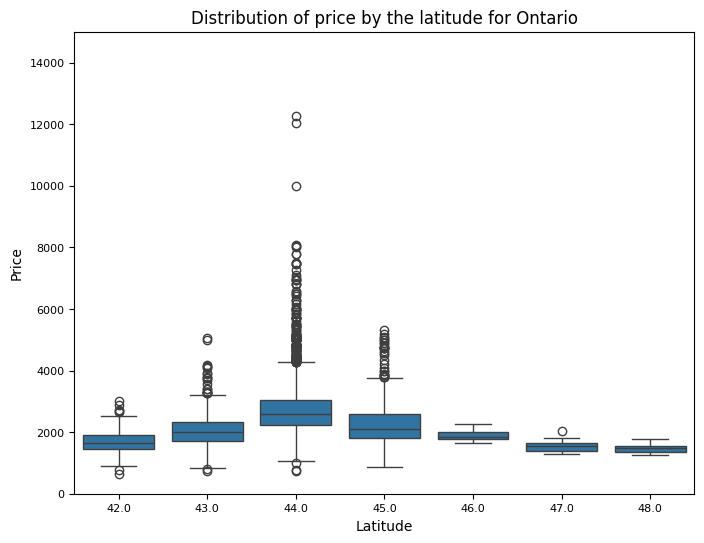

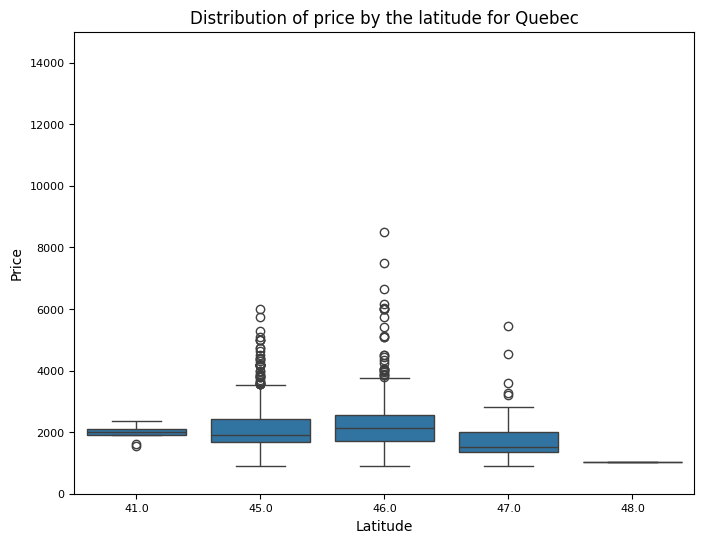

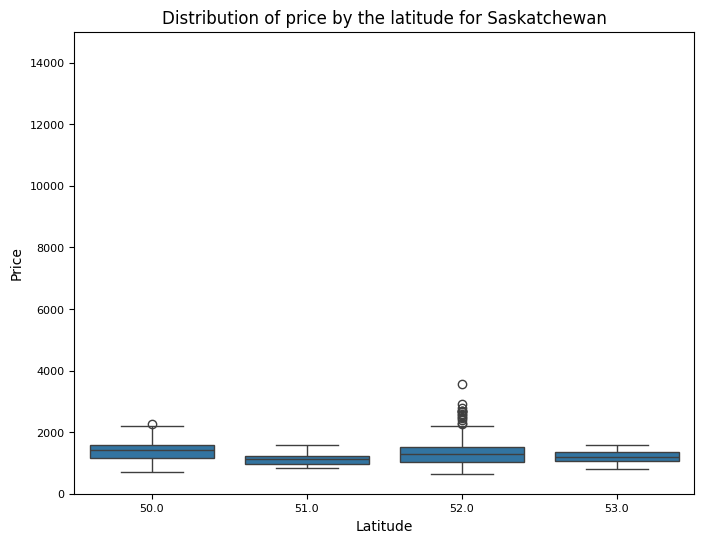

In [17]:
rent_df['lat'] = rent_df['latitude'].round(0)
rent_df['lat'].nunique()

for province in rent_df['province'].unique() :
    plt.figure(figsize = (8,6))

    ax = sns.boxplot(data=rent_df[rent_df['province'] == province], x='lat', y='price') 
    
    # Add Title
    ax.set_title(f'Distribution of price by the latitude for {province}')

    # Adjust the ticks label size
    ax.tick_params(axis='x', labelsize = 8)
    ax.tick_params(axis='y', labelsize = 8)

    # Set the axis labels 
    ax.set_xlabel('Latitude',fontsize = 10)
    ax.set_ylabel('Price',fontsize = 10)

    # Zooming in to removed outliers
    ax.set_ylim(0, 15000)
#    ax.set_xlim(0,6000)

    # Show plot
    plt.show()

**Price vs lease_term**

Lease terms impact the price a lot.

I believe it will be a good predictor.

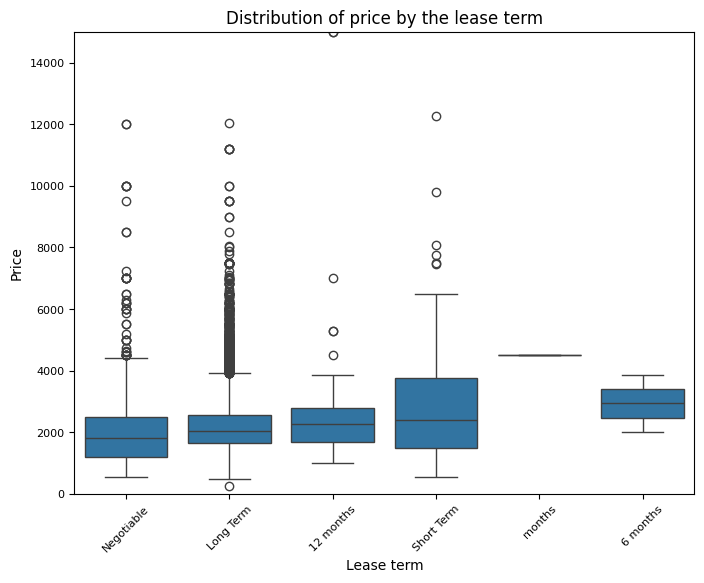

In [18]:
plt.figure(figsize = (8,6))

ax = sns.boxplot(data=rent_df, x="lease_term", y="price")

# Add Title
ax.set_title(f'Distribution of price by the lease term')

# Adjust the ticks label size
ax.tick_params(axis='x', labelrotation=45, labelsize = 8)
ax.tick_params(axis='y', labelsize = 8)

# Set the axis labels 
ax.set_xlabel('Lease term',fontsize = 10)
ax.set_ylabel('Price',fontsize = 10)

# Zooming in to removed outliers
ax.set_ylim(0, 15000)

plt.show()

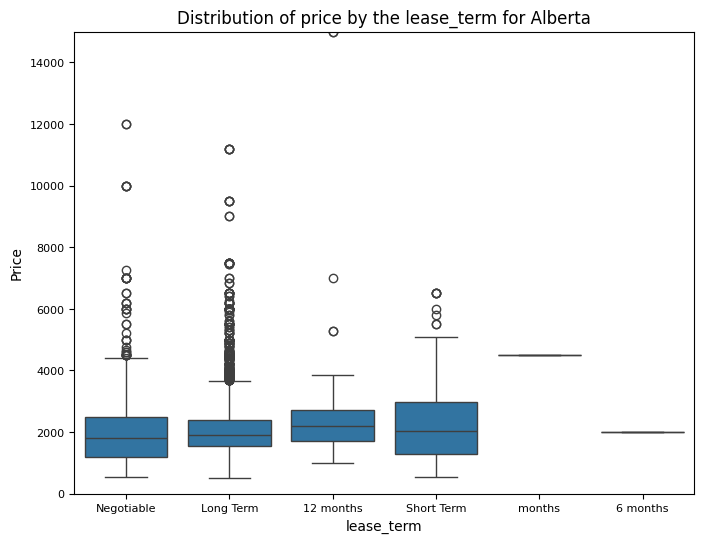

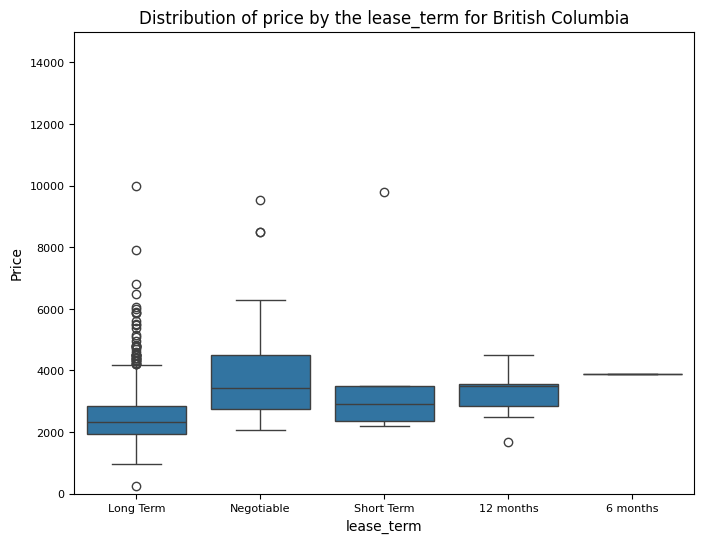

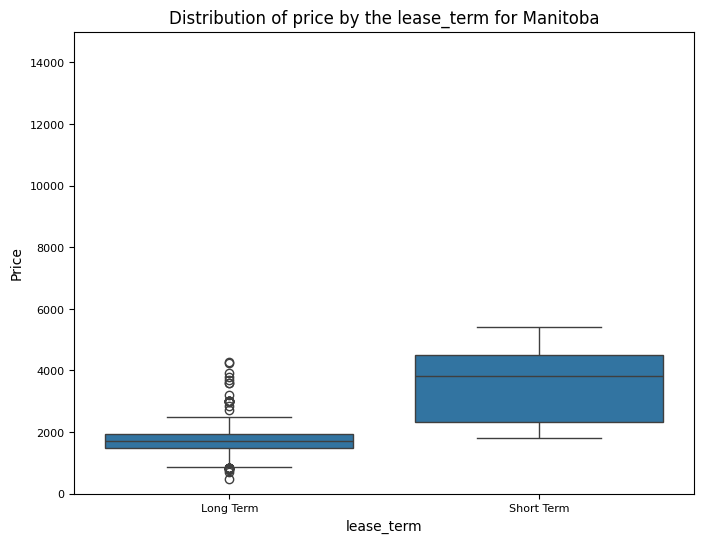

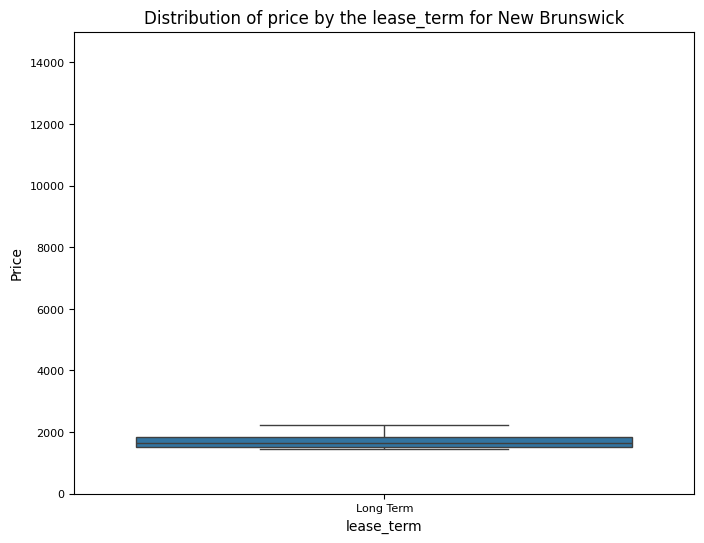

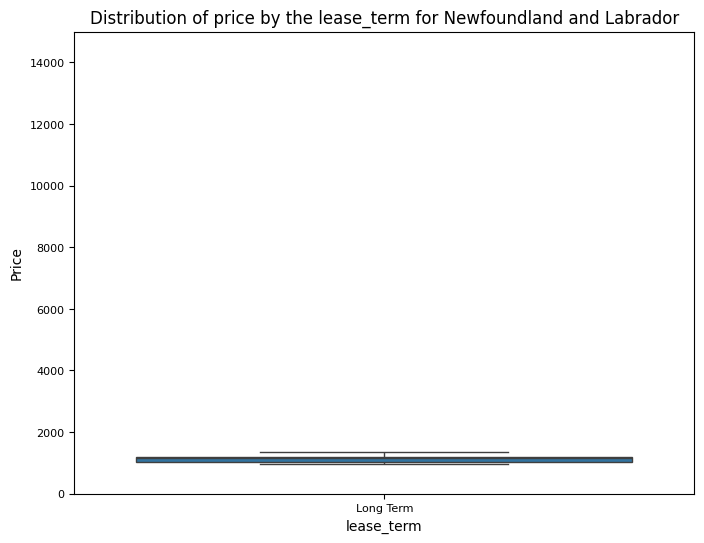

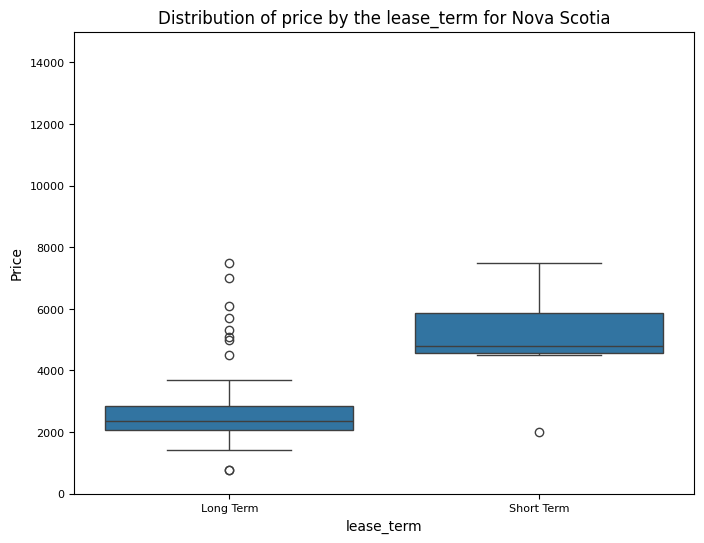

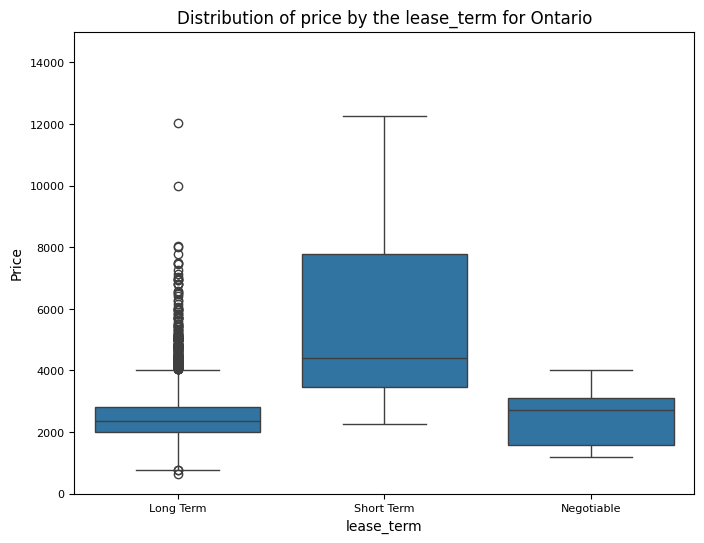

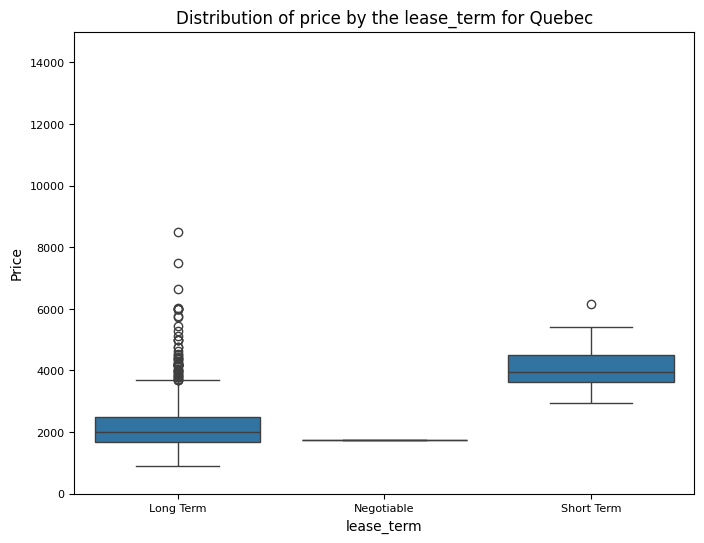

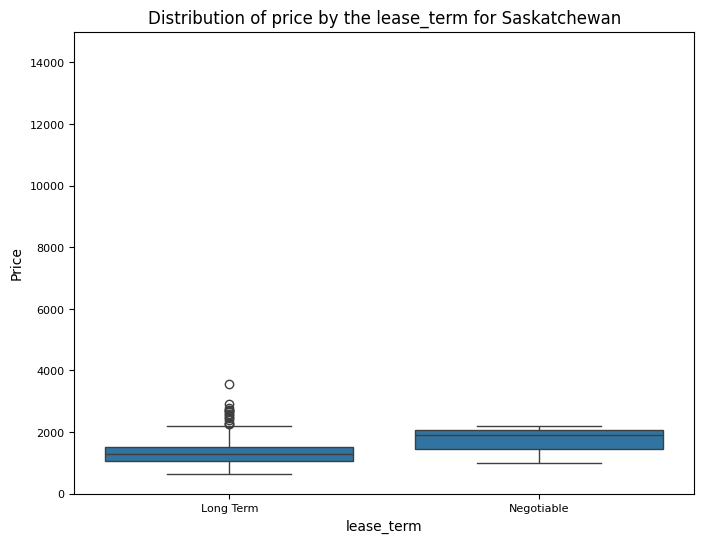

In [19]:
for province in rent_df['province'].unique() :
    plt.figure(figsize = (8,6))

    ax = sns.boxplot(data=rent_df[rent_df['province'] == province], x='lease_term', y='price') 
    
    # Add Title
    ax.set_title(f'Distribution of price by the lease_term for {province}')

    # Adjust the ticks label size
    ax.tick_params(axis='x', labelsize = 8)
    ax.tick_params(axis='y', labelsize = 8)

    # Set the axis labels 
    ax.set_xlabel('lease_term',fontsize = 10)
    ax.set_ylabel('Price',fontsize = 10)

    # Zooming in to removed outliers
    ax.set_ylim(0, 15000)
#    ax.set_xlim(0,6000)

    # Show plot
    plt.show()

**Price vs # of bathroom**
The number of bathrooms in a rental has a direct impact on the price.

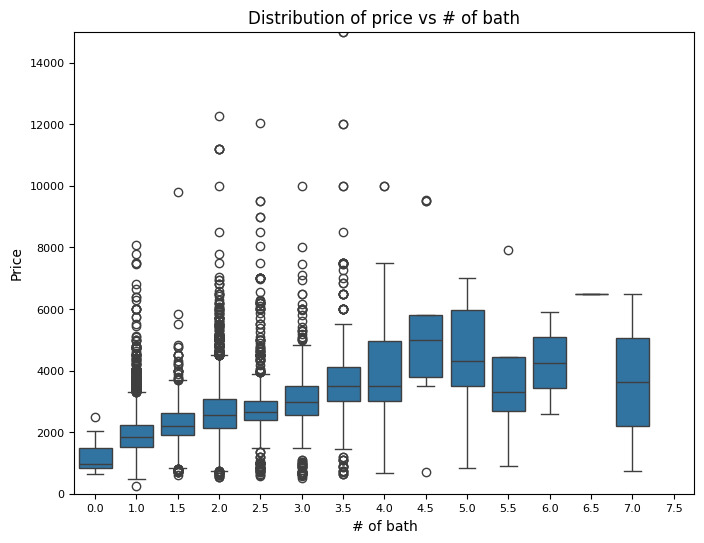

In [20]:
plt.figure(figsize = (8,6))

ax = sns.boxplot(data=rent_df, x="baths", y="price")

# Add Title
ax.set_title(f'Distribution of price vs # of bath')

# Adjust the ticks label size
ax.tick_params(axis='x', labelsize = 8)
ax.tick_params(axis='y', labelsize = 8)

# Set the axis labels 
ax.set_xlabel('# of bath',fontsize = 10)
ax.set_ylabel('Price',fontsize = 10)

# Zooming in to removed outliers
ax.set_ylim(0, 15000)

plt.show()